# Response characterization
**9th april 2024 (edited the 6th May 2024)**

*Célien Vandromme*

---

In [1]:
import numpy as np
import pandas as pd
import percephone.core.recording as pc
import os
import matplotlib
import percephone.plts.stats as ppt
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count, pool
import warnings

plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 2
plt.switch_backend("Qt5Agg")
matplotlib.use("Qt5Agg")
%matplotlib inline
warnings.filterwarnings('ignore')
fontsize = 20

In [2]:
user = "Célien"

if user == "Célien":
    directory = "C:/Users/cvandromme/Desktop/Data/"
    roi_path = "C:/Users/cvandromme/Desktop/FmKO_ROIs&inhibitory.xlsx"
elif user == "Théo":
    directory = "/datas/Théo/Projects/Percephone/data/Amplitude_Detection/loop_format_tau_02/"
    roi_path = directory + "/FmKO_ROIs&inhibitory.xlsx"
    
roi_info = pd.read_excel(roi_path)
files = os.listdir(directory)
files_ = [file for file in files if file.endswith("synchro")]

def opening_rec(fil, i):
    rec = pc.RecordingAmplDet(directory + fil + "/", 0, roi_path)
    rec.peak_delay_amp()
    rec.auc()
    return rec

workers = cpu_count()
if user == "Célien":
    pool = pool.ThreadPool(processes=workers)
elif user == "Théo":
    pool = Pool(processes=workers)
async_results = [pool.apply_async(opening_rec, args=(file, i)) for i, file in enumerate(files_)]
recs = {ar.get().filename: ar.get() for ar in async_results}

Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorpor

# Comparison of a parameter between groups according to stimulation detection

---

In [17]:
def group_comp_param(recs, parameter, exc_neurons=True, inh_neurons=False, ko_hypo_only=False, stim_ampl="all", ylim=[]):
    for response_type in [-1, 1]:
        
        wt_det, wt_undet, ko_det, ko_undet = [], [], [], []
        ko_type = "KO-Hypo" if ko_hypo_only else "(KO + KO-Hypo)"
        
        for rec in recs.values():
            if ko_hypo_only and rec.genotype == "KO":
                continue
            else:
                # Filtering stimulation amplitudes
                stim_filter = rec.stim_ampl_filter(stim_ampl)
                
                # Responsivity and parameter matrices building or retrieving according to neuron type
                if exc_neurons and inh_neurons:
                    resp_mat = np.row_stack((rec.matrices["EXC"]["Responsivity"], rec.matrices["INH"]["Responsivity"]))
                    para_mat = np.row_stack((rec.matrices["EXC"][parameter], rec.matrices["INH"][parameter]))
                    neuron_type = "EXC & INH"
                elif exc_neurons:
                    resp_mat = rec.matrices["EXC"]["Responsivity"]
                    para_mat = rec.matrices["EXC"][parameter]
                    neuron_type = "EXC"
                elif inh_neurons:
                    resp_mat = rec.matrices["INH"]["Responsivity"]
                    para_mat = rec.matrices["INH"][parameter]
                    neuron_type = "INH"
                
                # For detected stimuli
                stim_thre_det = np.logical_and(stim_filter, rec.detected_stim)
                resp_detected = resp_mat[:,stim_thre_det]
                detected = para_mat[:,stim_thre_det]
                det = np.where(resp_detected == response_type, detected, np.nan)
                
                # For undetected stimuli
                stim_thre_undet = np.logical_and(stim_filter, np.invert(rec.detected_stim))
                resp_undetected = resp_mat[:,stim_thre_undet]
                undetected = para_mat[:,stim_thre_undet]
                undet = np.where(resp_undetected == response_type, undetected, np.nan)
                
                if rec.genotype == "WT":
                    wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
                    wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
                else:
                    ko_det.append(np.nanmean(np.nanmean(det, axis=1)))
                    ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            
        fig, axs = plt.subplots(1, 2, figsize=(10, 8))
        ppt.boxplot(axs[0], wt_det, ko_det, f"{parameter}", ylim=ylim)
        ppt.boxplot(axs[1], wt_undet, ko_undet, f"{parameter}", ylim=ylim)
        axs[0].set_title("Detected Stimuli")
        axs[1].set_title("Undetected Stimuli")
        fig.suptitle(f"Mean {parameter} for {neuron_type} neurons that have a response of {response_type} between WT and {ko_type}. Amplitude(s): {stim_ampl}")

## AUC

### All amplitudes

Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=0.9352995761394265, pvalue=0.5333796585612673)
ShapiroResult(statistic=0.7815445858482557, pvalue=0.02677769870752901)
MannwhitneyuResult(statistic=47.0, pvalue=0.11416083916083916)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=0.7803588930357668, pvalue=0.026048050896673416)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, 

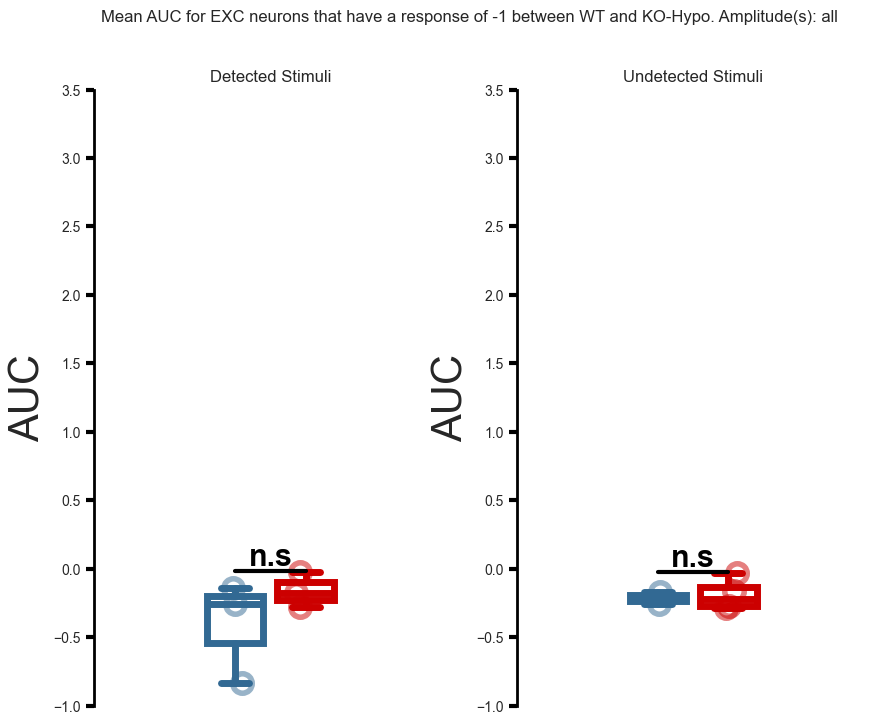

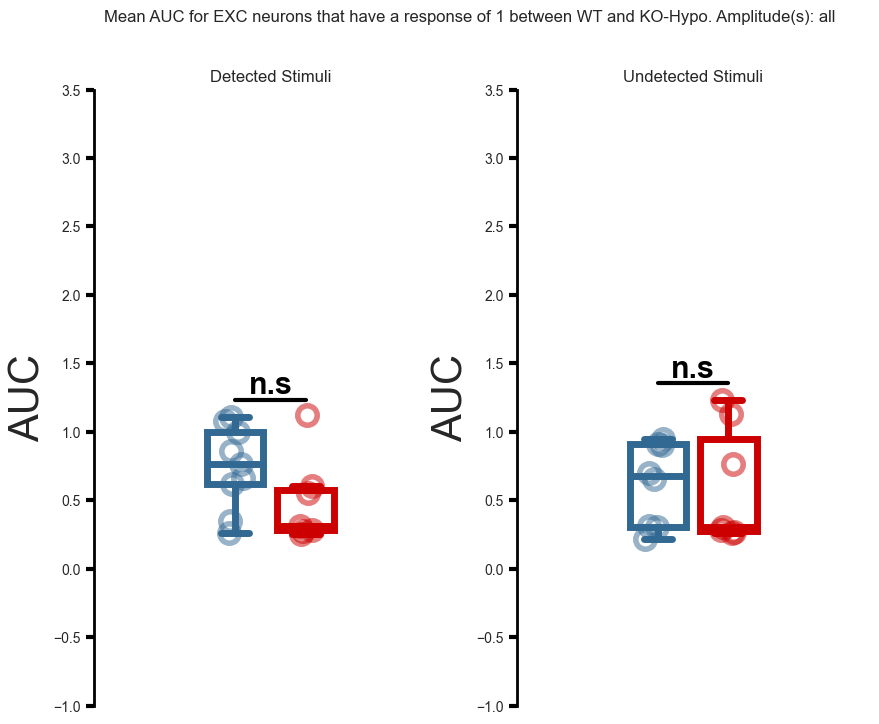

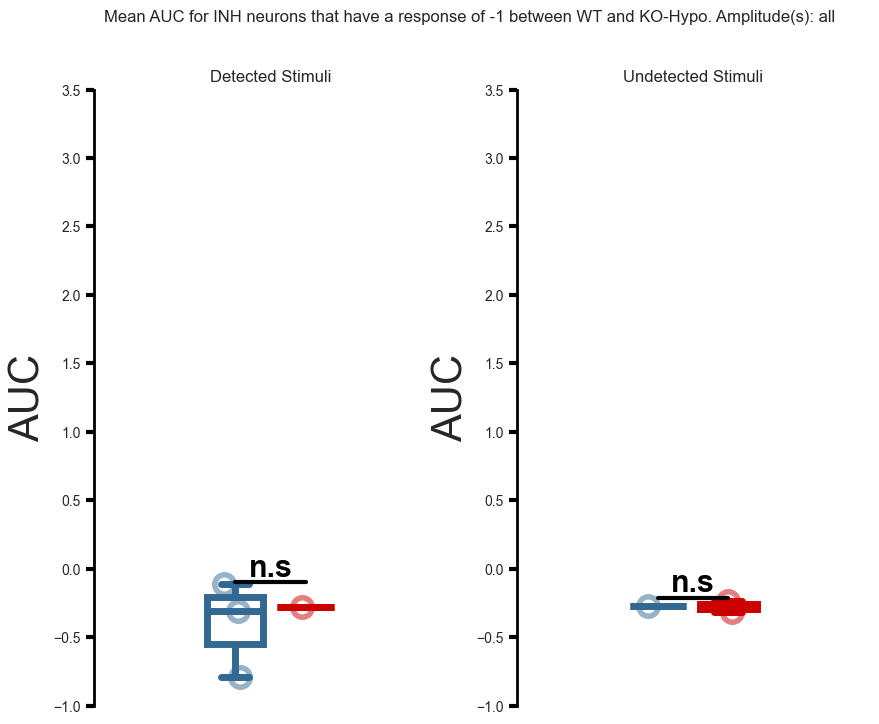

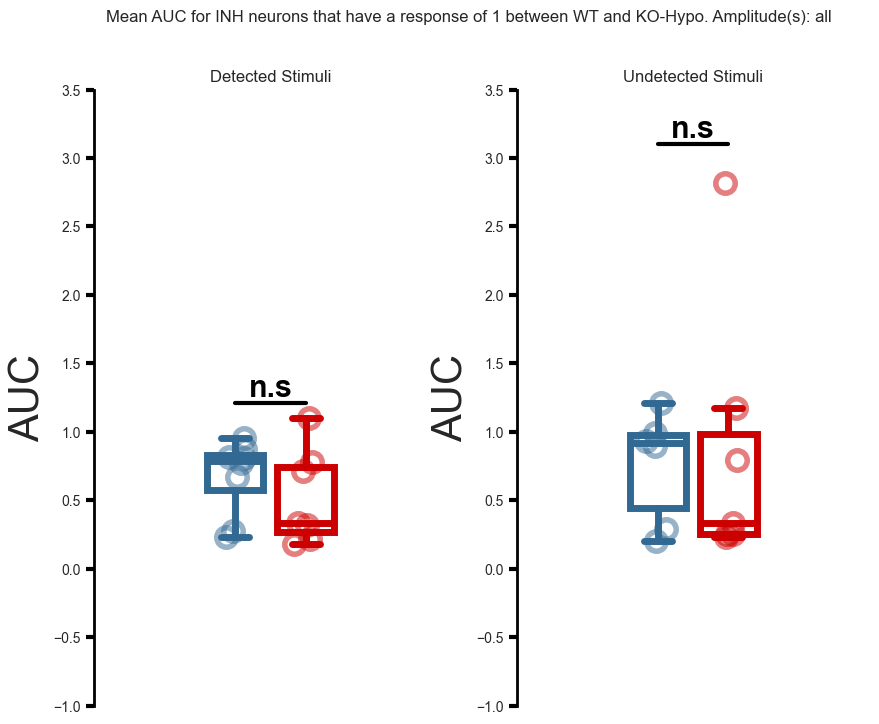

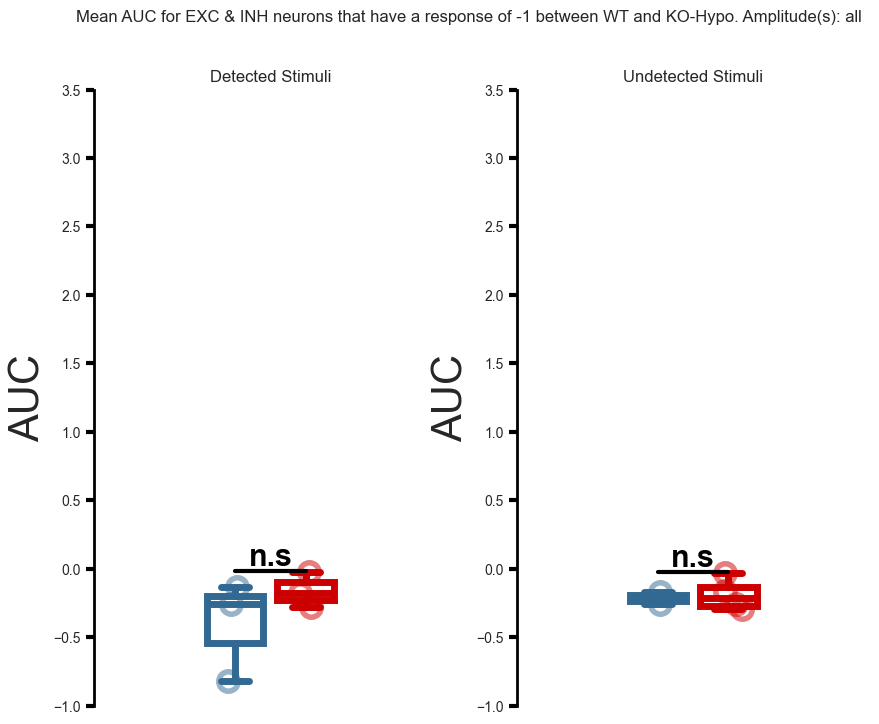

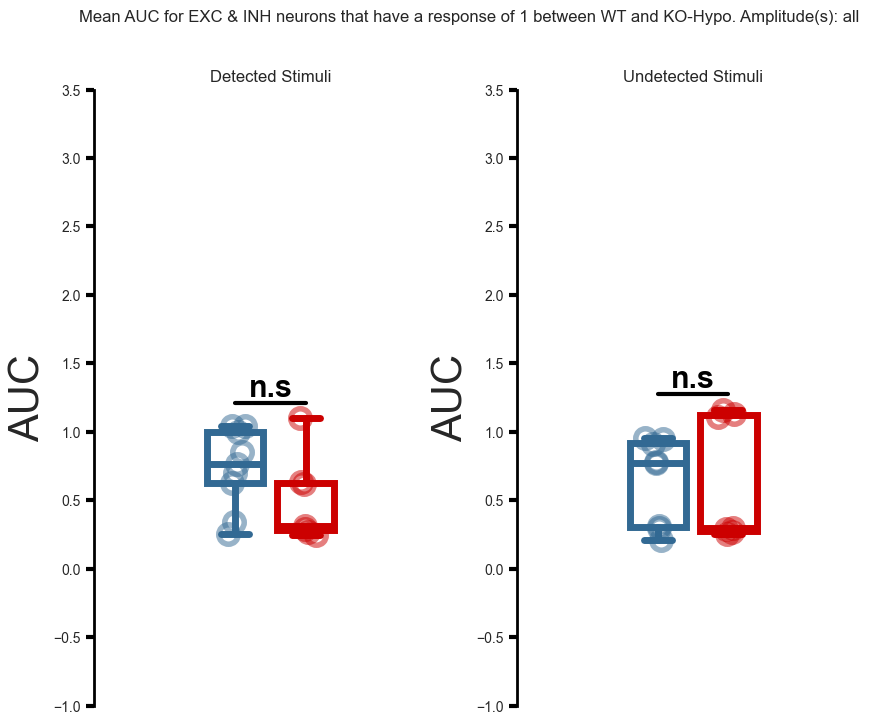

In [4]:
group_comp_param(recs, parameter="AUC", exc_neurons=True, inh_neurons=False, ko_hypo_only=True, stim_ampl="all", ylim=[-1, 3.5])
group_comp_param(recs, parameter="AUC", exc_neurons=False, inh_neurons=True, ko_hypo_only=True, stim_ampl="all", ylim=[-1, 3.5])
group_comp_param(recs, parameter="AUC", exc_neurons=True, inh_neurons=True, ko_hypo_only=True, stim_ampl="all", ylim=[-1, 3.5])

### Threshold amplitude

Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=0.6139485237853626, pvalue=0.0003963814143324269)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=0.7931907890588425, pvalue=0.03505564249963579)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, 

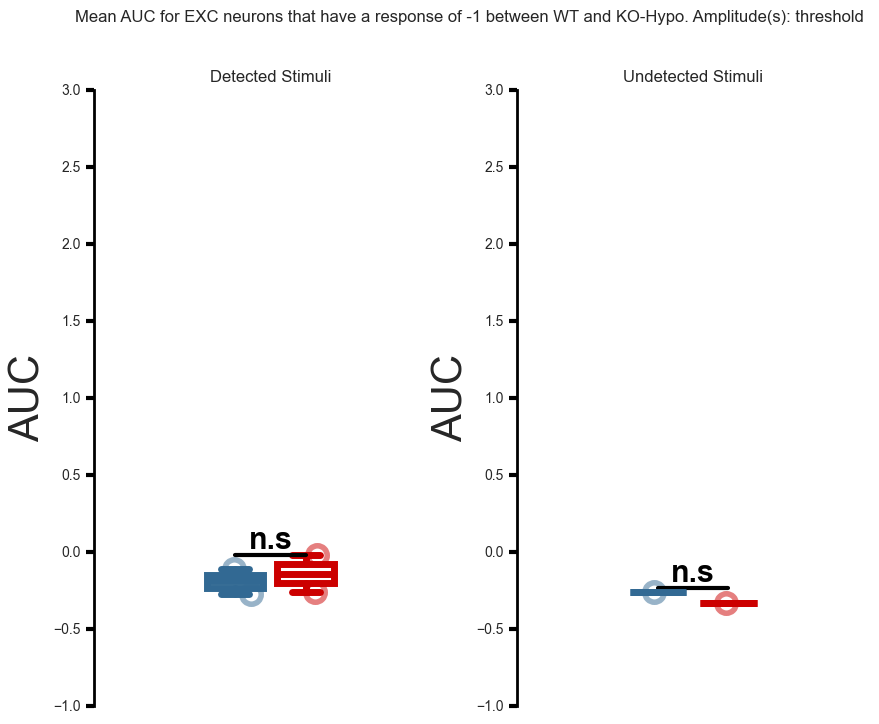

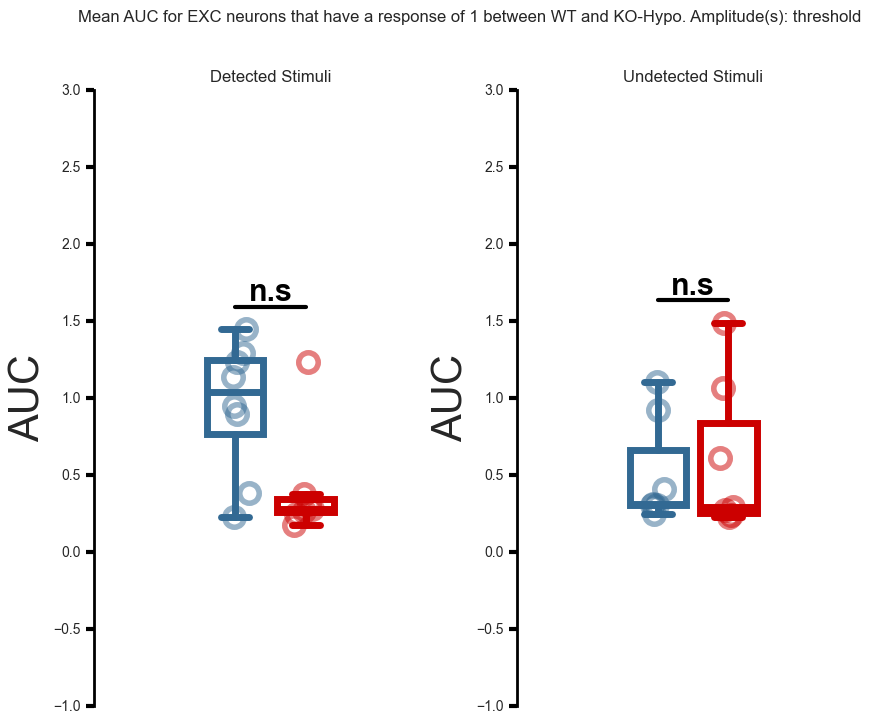

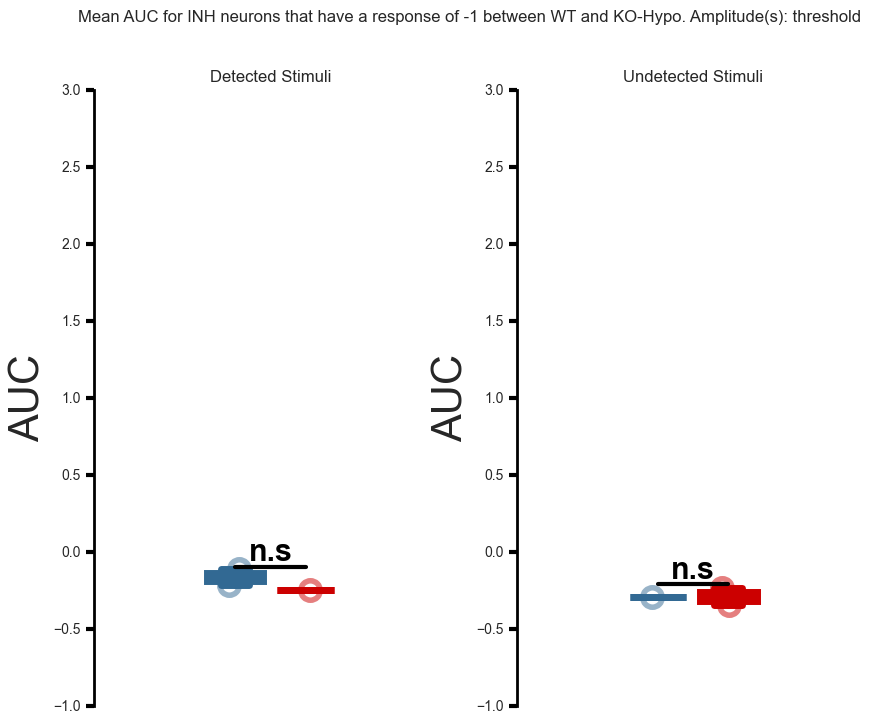

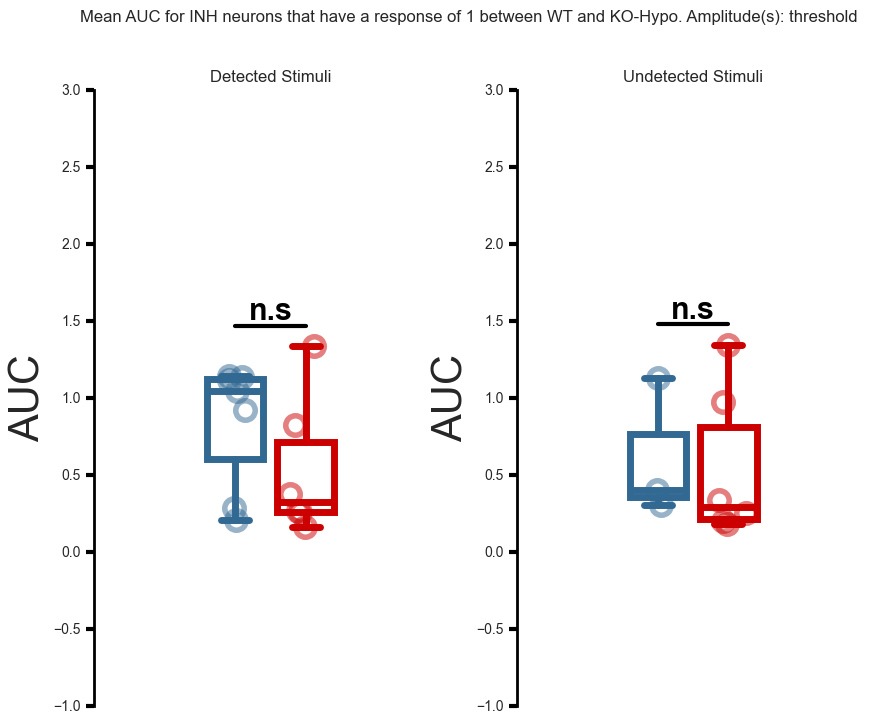

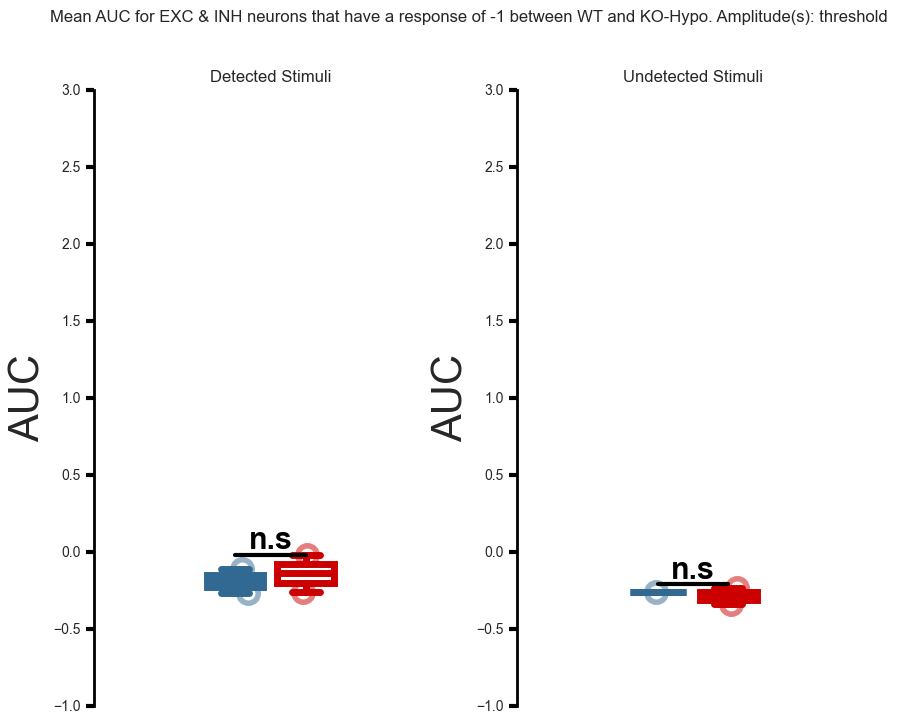

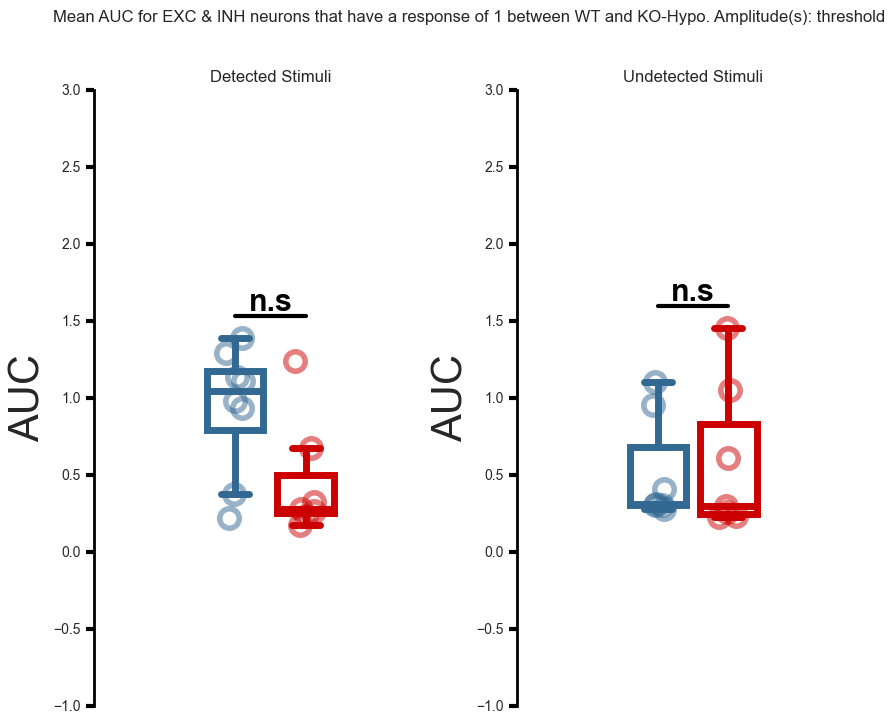

In [5]:
group_comp_param(recs, parameter="AUC", exc_neurons=True, inh_neurons=False, ko_hypo_only=True, stim_ampl="threshold", ylim=[-1, 3])
group_comp_param(recs, parameter="AUC", exc_neurons=False, inh_neurons=True, ko_hypo_only=True, stim_ampl="threshold", ylim=[-1, 3])
group_comp_param(recs, parameter="AUC", exc_neurons=True, inh_neurons=True, ko_hypo_only=True, stim_ampl="threshold", ylim=[-1, 3])

## Peak delay

### All amplitudes

Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=0.9287092678941377, pvalue=0.4691534968263089)
ShapiroResult(statistic=0.8711051905470248, pvalue=0.18980051941906673)
LeveneResult(statistic=0.013833569386910194, pvalue=0.9080425263066327)
Equal variances :TtestResult(statistic=0.580709871686724, pvalue=0.5706663137041139, df=14.0)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=0.8808115332367277, pvalue=0.23007481307012495)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
Mannwhitn

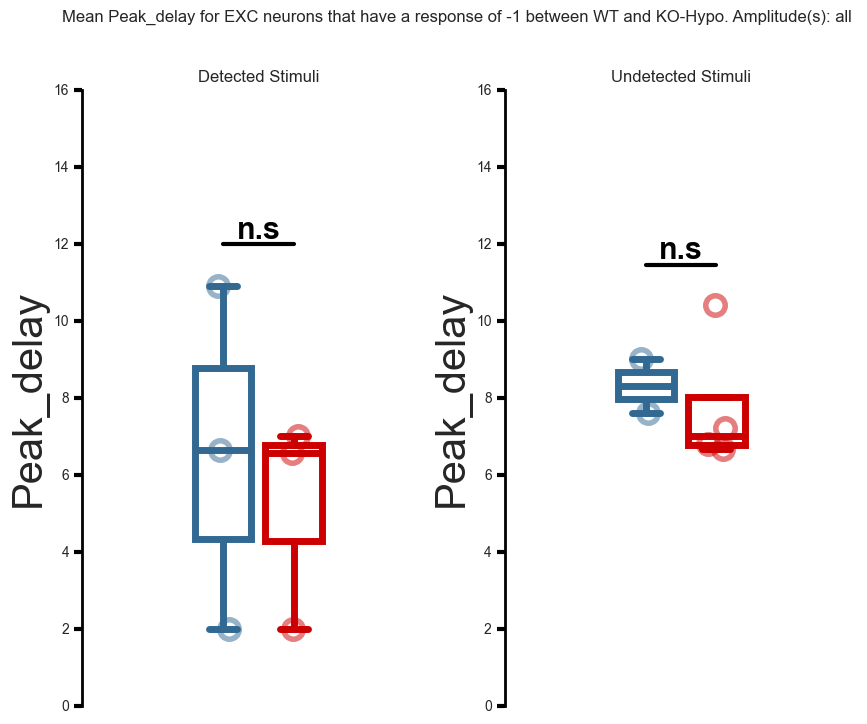

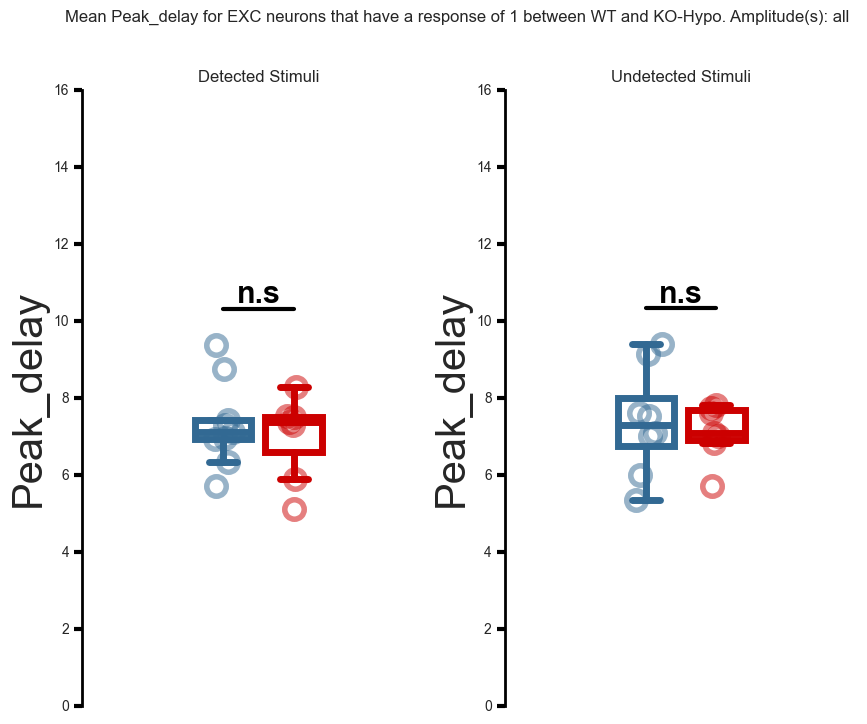

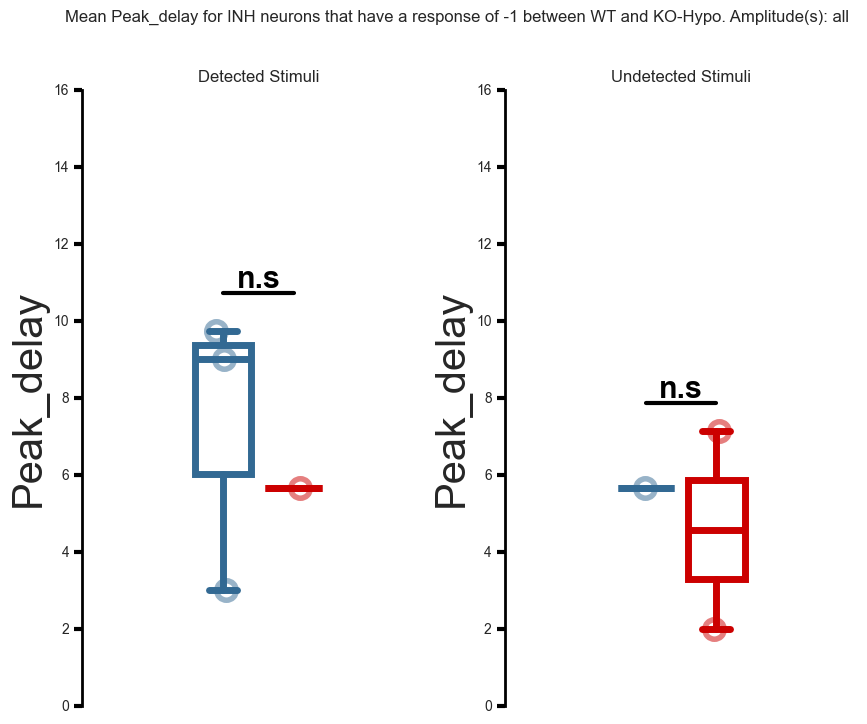

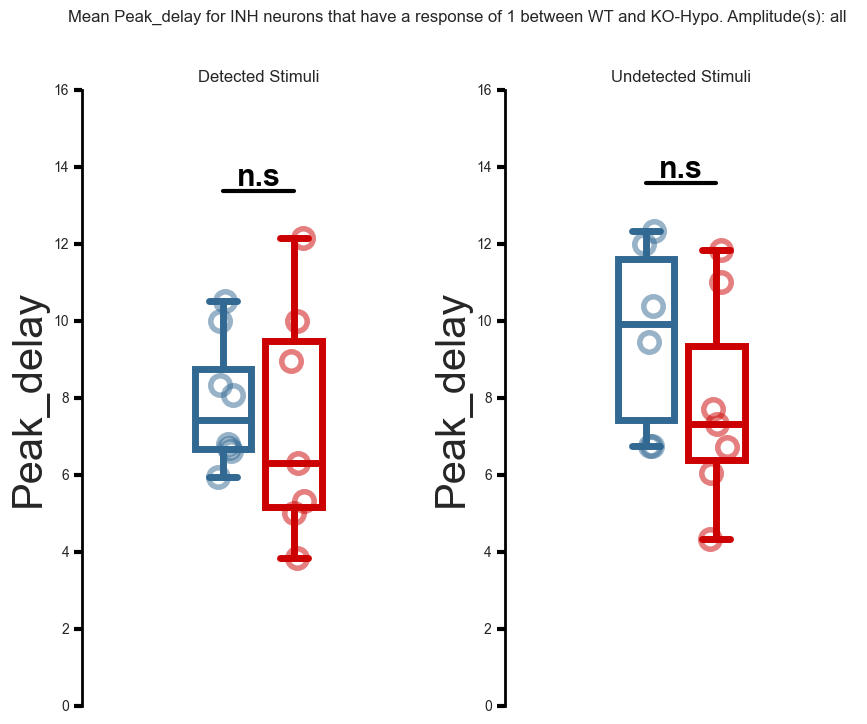

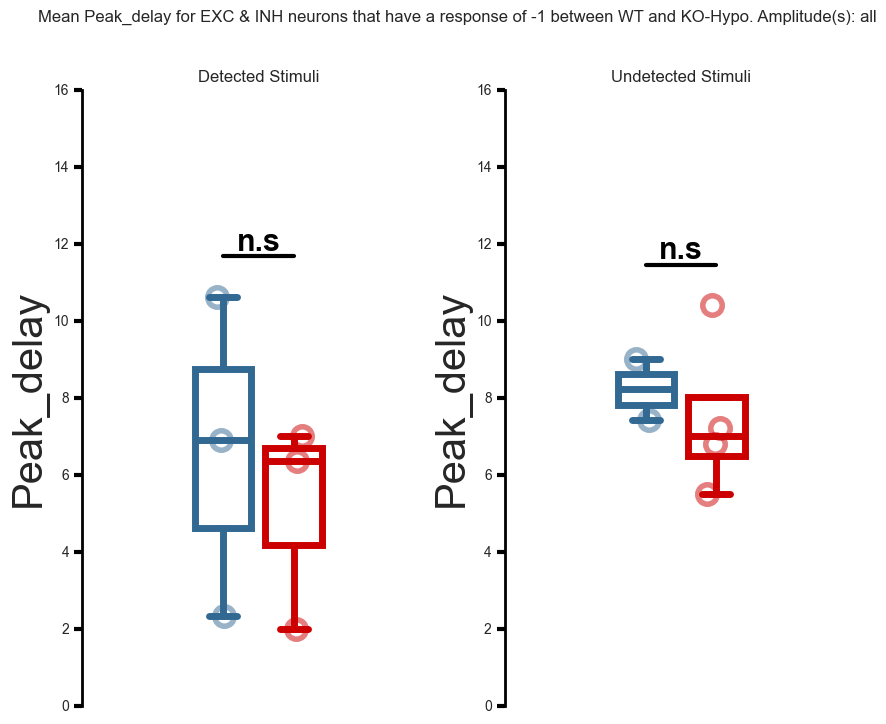

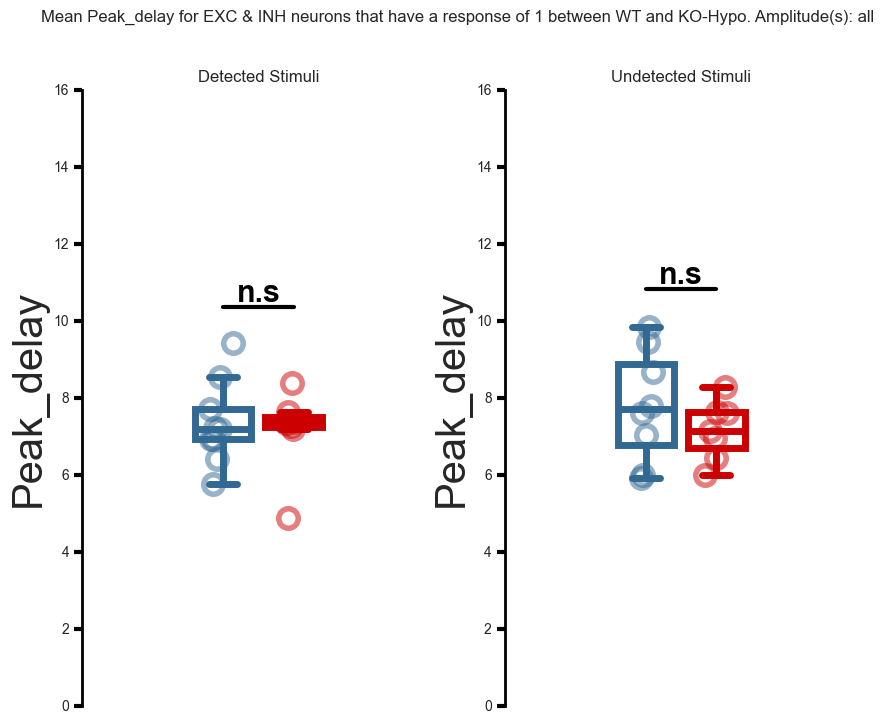

In [6]:
group_comp_param(recs, parameter="Peak_delay", exc_neurons=True, inh_neurons=False, ko_hypo_only=True, stim_ampl="all", ylim=[1, 15])
group_comp_param(recs, parameter="Peak_delay", exc_neurons=False, inh_neurons=True, ko_hypo_only=True, stim_ampl="all", ylim=[1, 15])
group_comp_param(recs, parameter="Peak_delay", exc_neurons=True, inh_neurons=True, ko_hypo_only=True, stim_ampl="all", ylim=[1, 15])

### Threshold amplitude

Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=0.8902280065722159, pvalue=0.2758550406409905)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=0.9013988602213503, pvalue=0.33953627096976075)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=

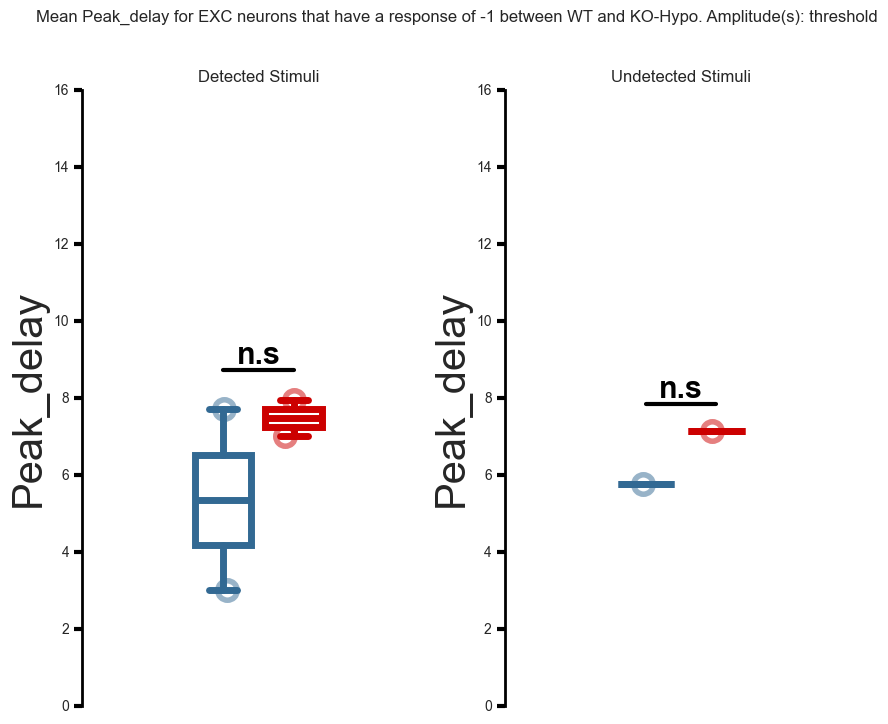

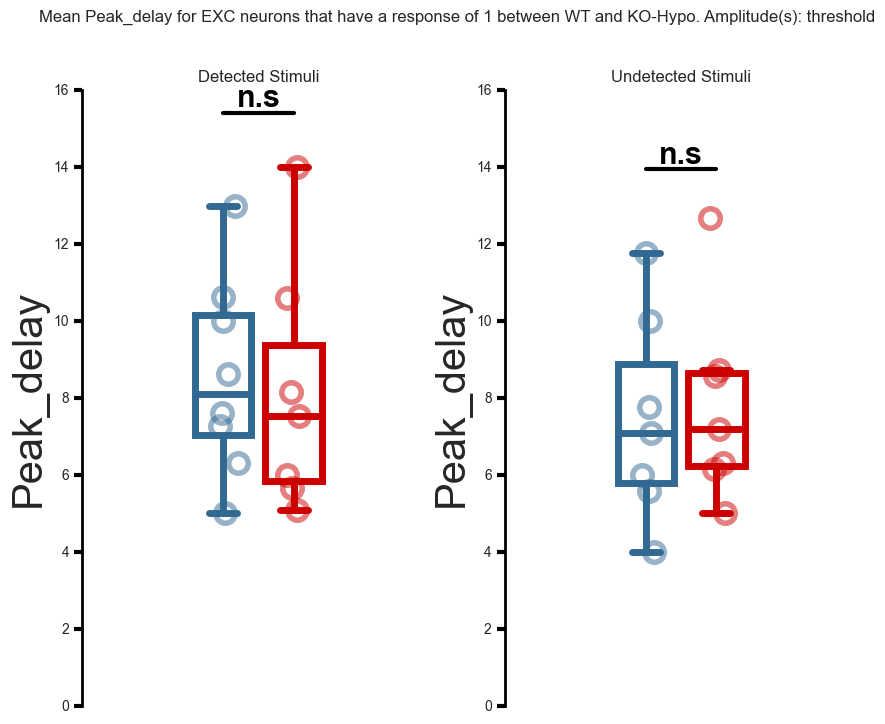

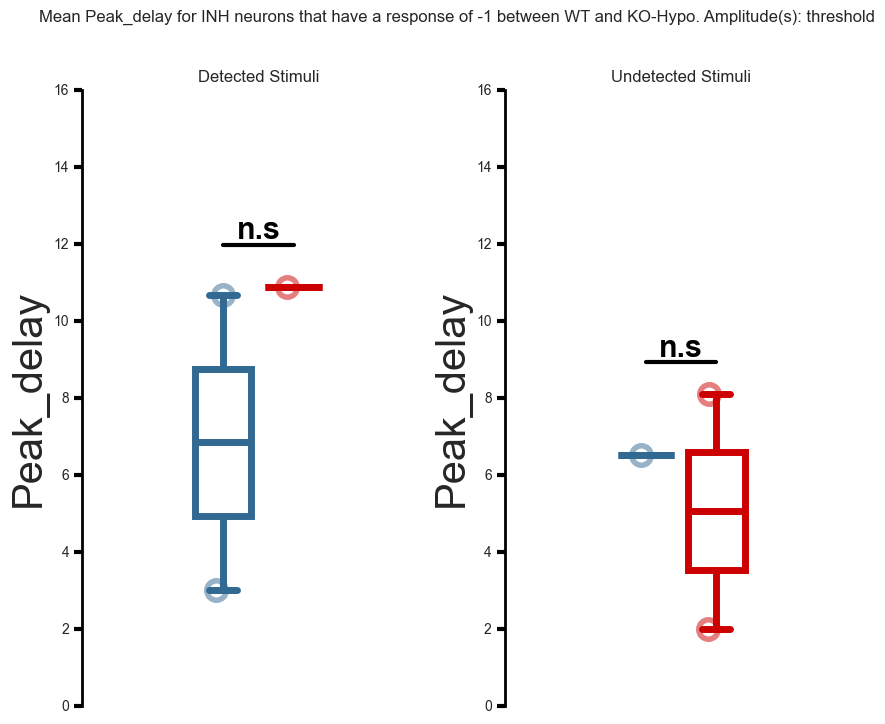

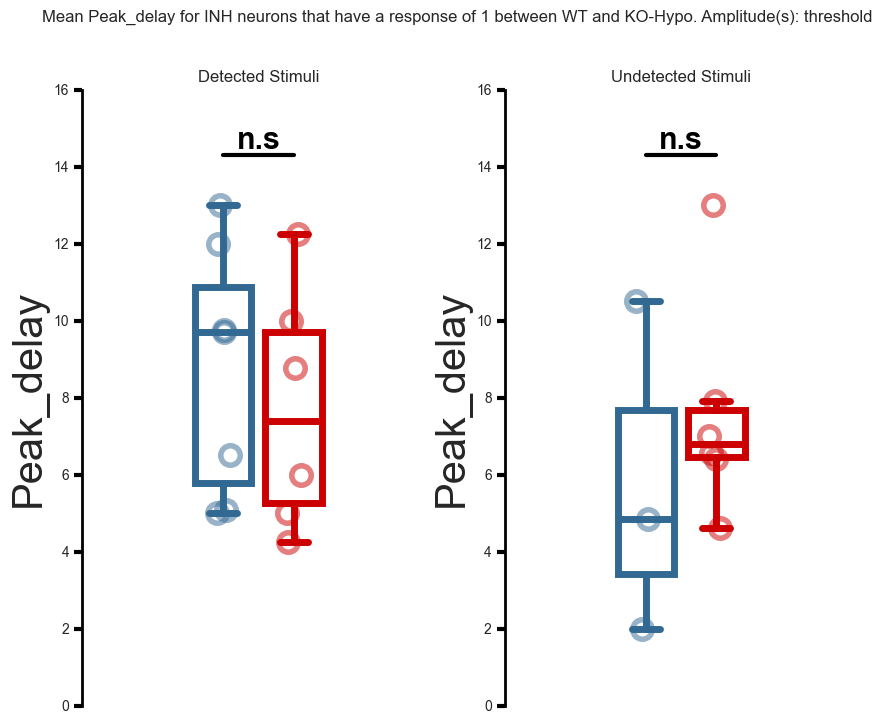

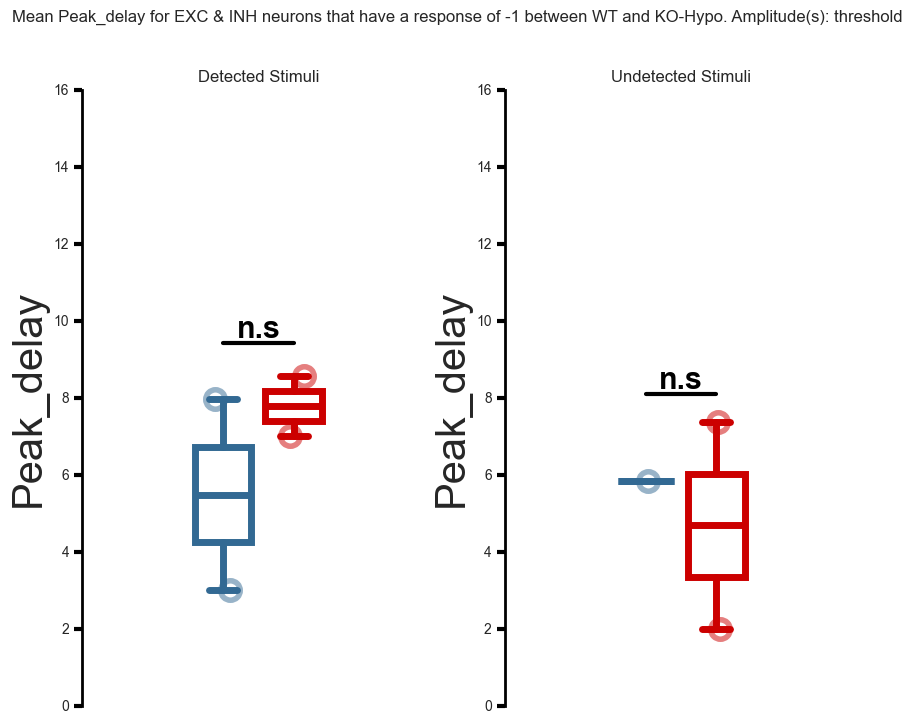

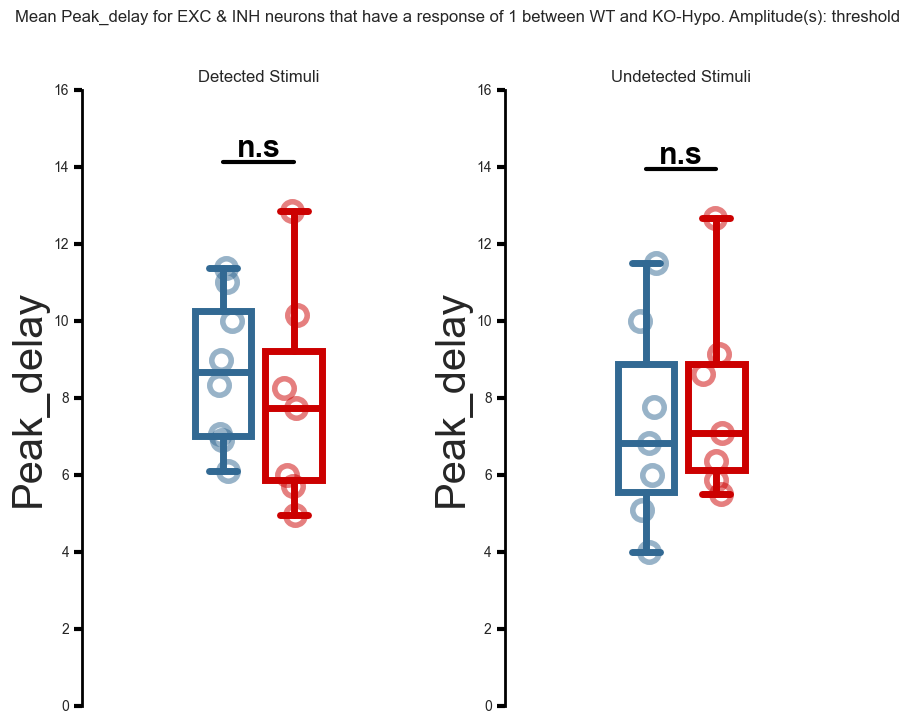

In [7]:
group_comp_param(recs, parameter="Peak_delay", exc_neurons=True, inh_neurons=False, ko_hypo_only=True, stim_ampl="threshold", ylim=[1, 15])
group_comp_param(recs, parameter="Peak_delay", exc_neurons=False, inh_neurons=True, ko_hypo_only=True, stim_ampl="threshold", ylim=[1, 15])
group_comp_param(recs, parameter="Peak_delay", exc_neurons=True, inh_neurons=True, ko_hypo_only=True, stim_ampl="threshold", ylim=[1, 15])

## Peak amplitude

### All amplitude

Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=0.7180817565266975, pvalue=0.0023067656679965154)
ShapiroResult(statistic=0.9230057763216404, pvalue=0.49310436792236745)
MannwhitneyuResult(statistic=46.0, pvalue=0.14160839160839161)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=0.9104621907822716, pvalue=0.39908362705620226)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
Sh

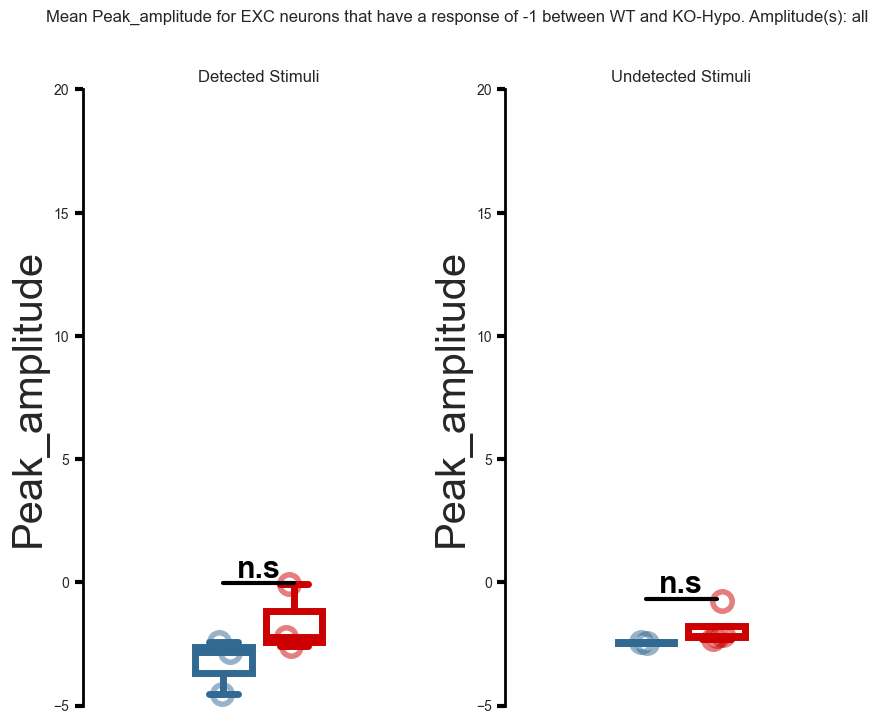

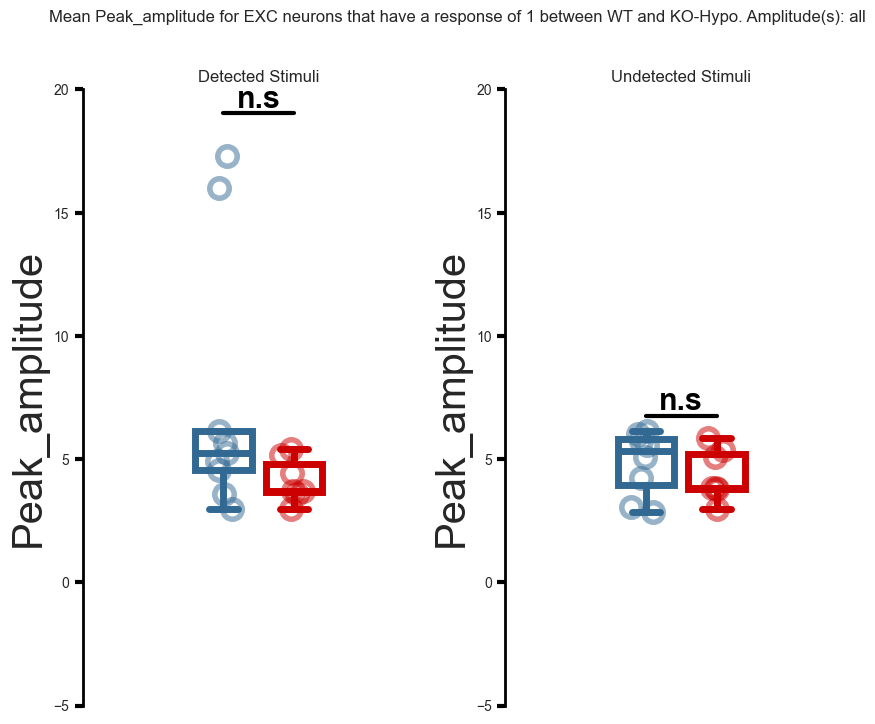

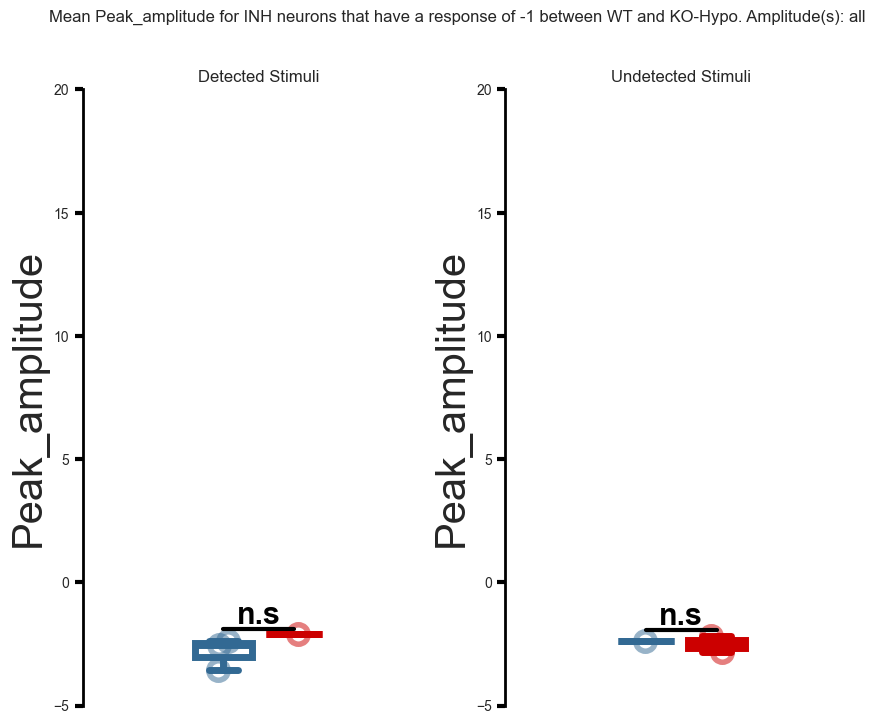

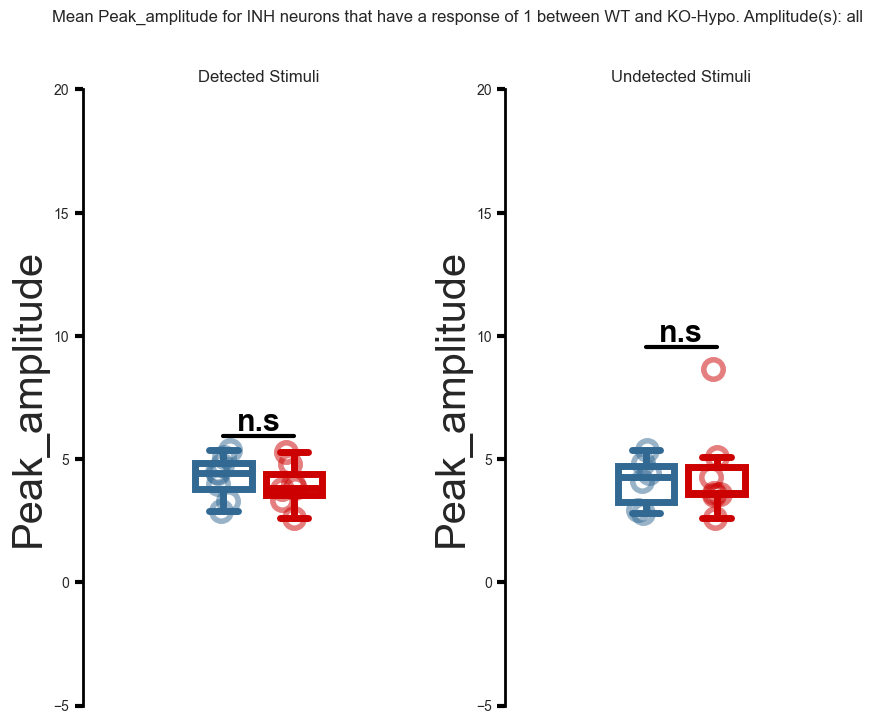

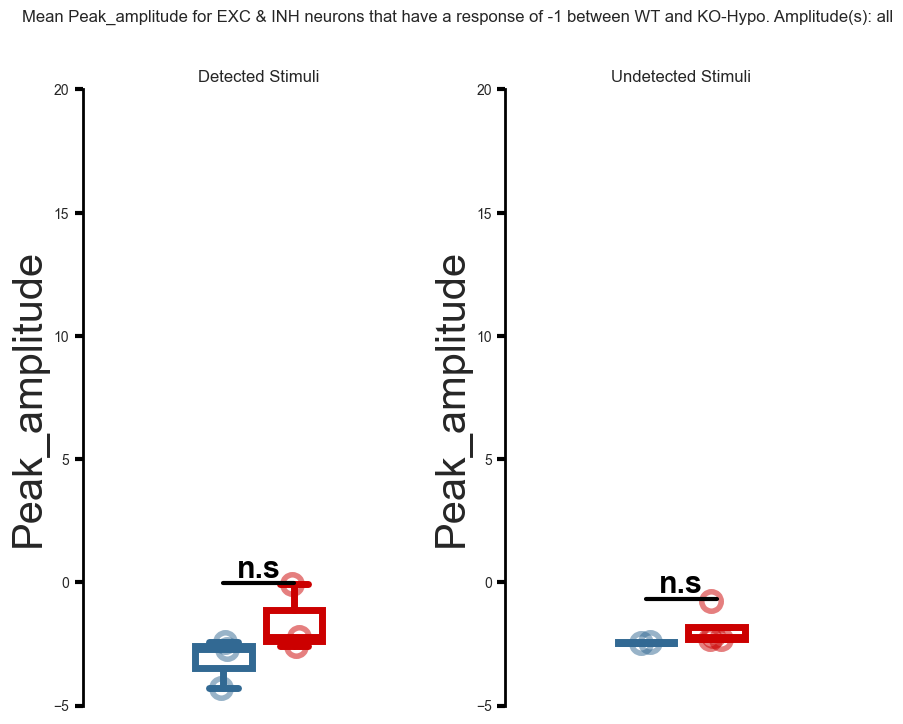

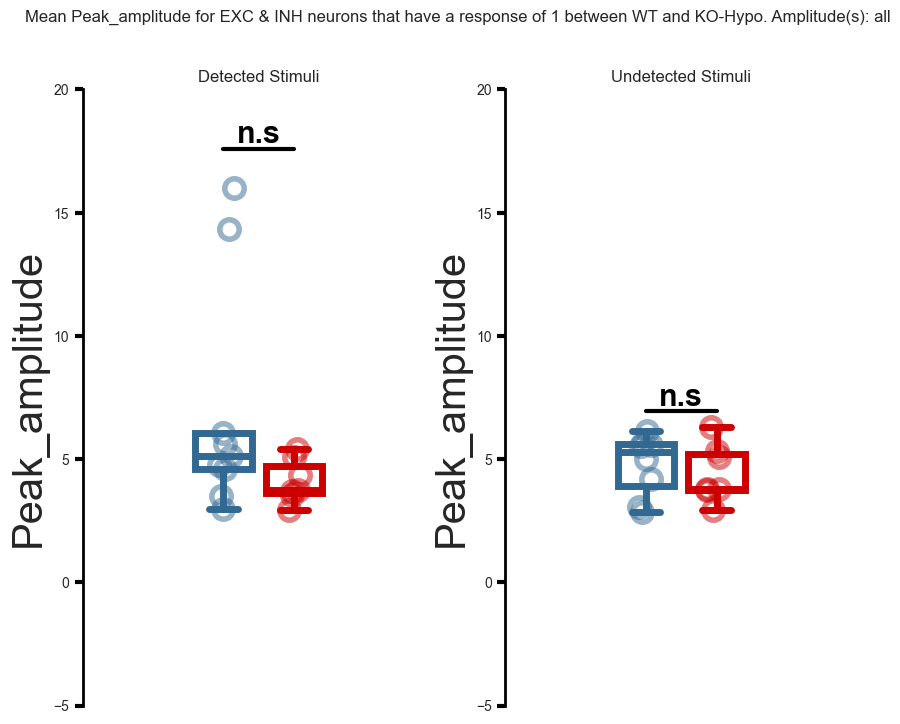

In [8]:
group_comp_param(recs, parameter="Peak_amplitude", exc_neurons=True, inh_neurons=False, ko_hypo_only=True, stim_ampl="all", ylim=[-5, 20])
group_comp_param(recs, parameter="Peak_amplitude", exc_neurons=False, inh_neurons=True, ko_hypo_only=True, stim_ampl="all", ylim=[-5, 20])
group_comp_param(recs, parameter="Peak_amplitude", exc_neurons=True, inh_neurons=True, ko_hypo_only=True, stim_ampl="all", ylim=[-5, 20])

### Threshold amplitude

Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=0.9137935711092721, pvalue=0.4227643325957342)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=0.9066951525820296, pvalue=0.3734649289863273)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult

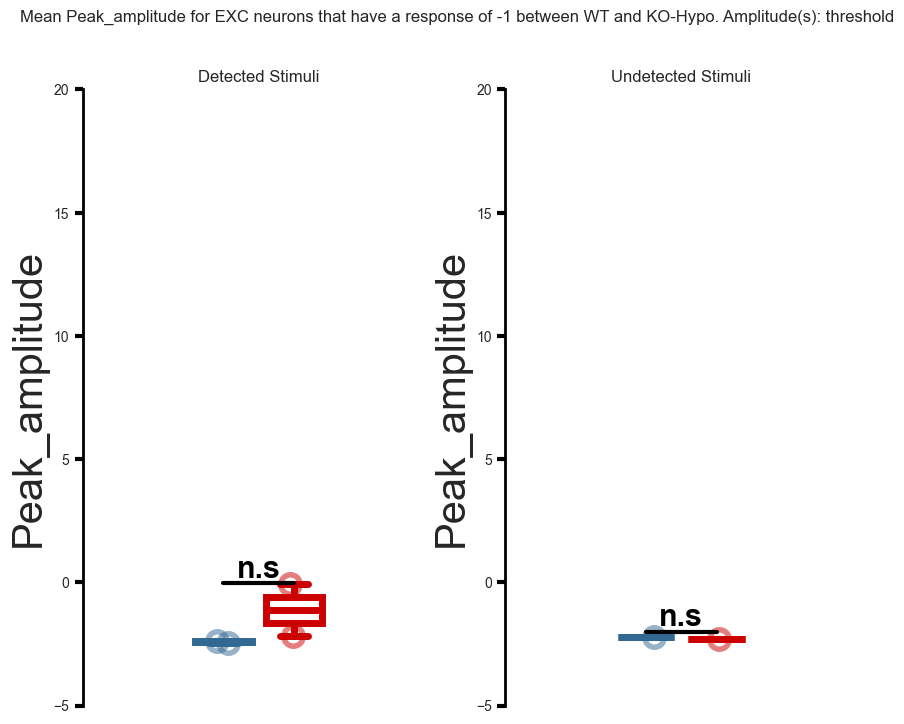

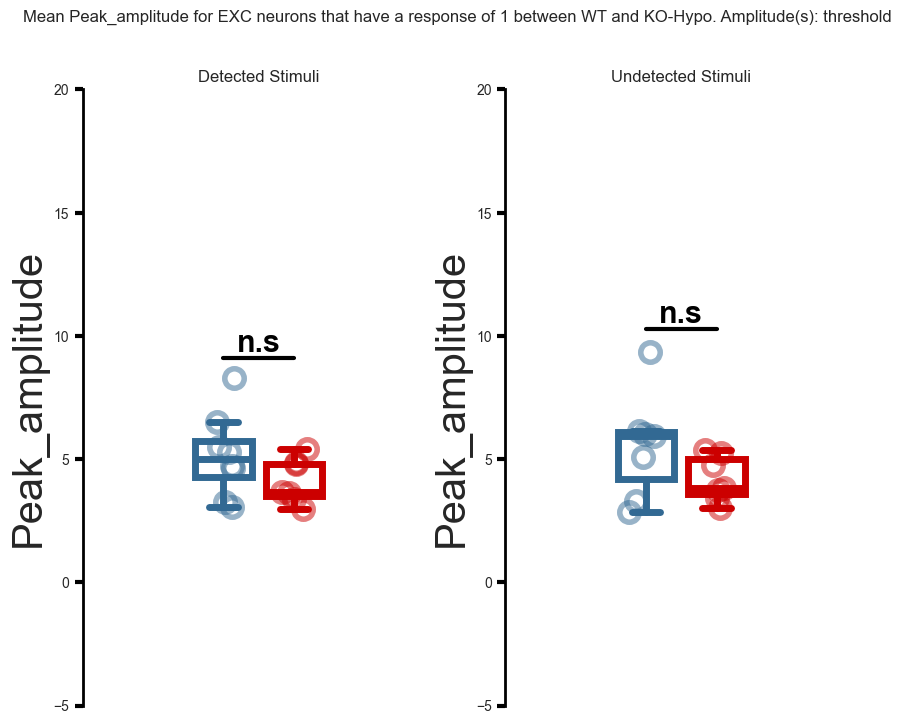

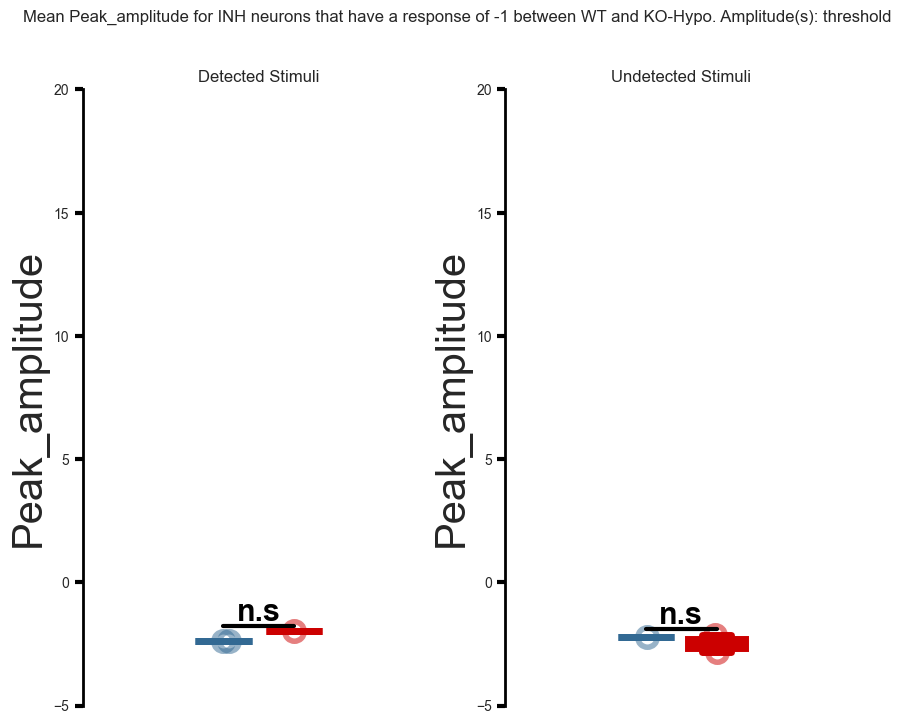

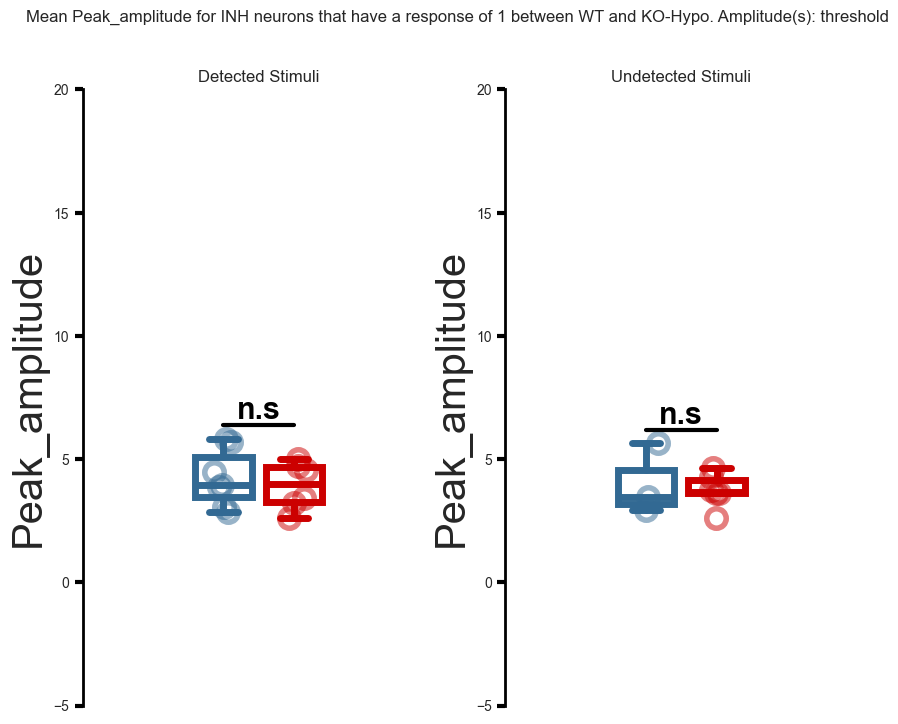

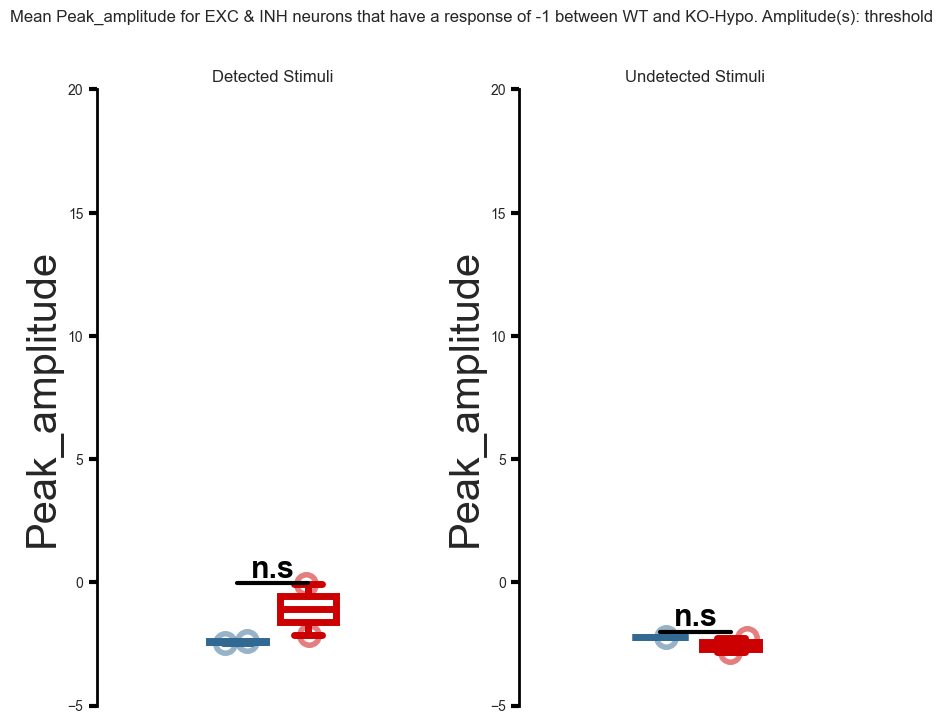

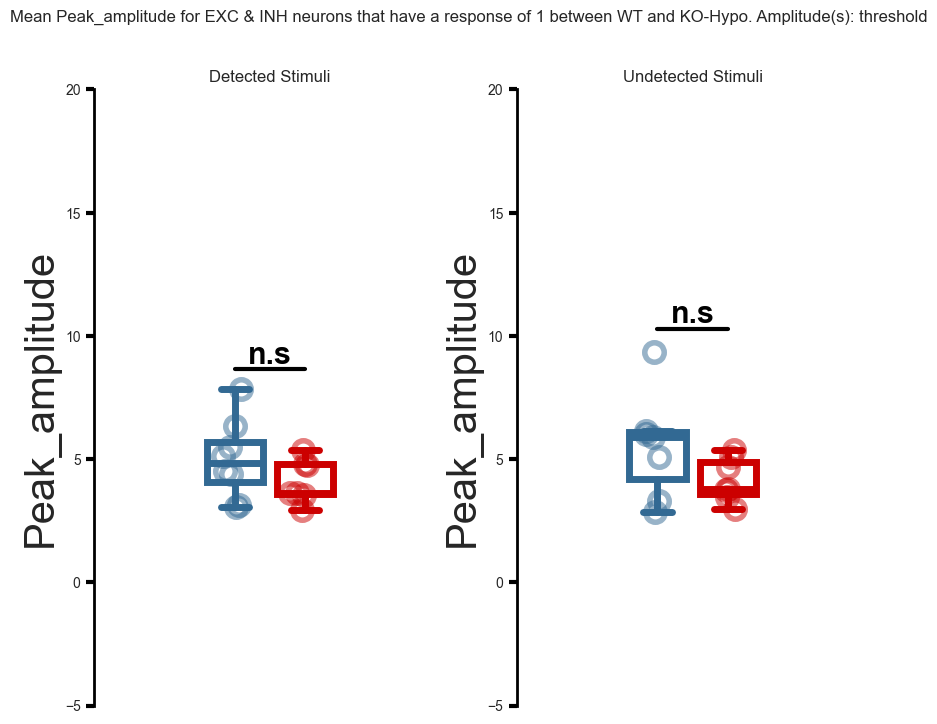

In [9]:
group_comp_param(recs, parameter="Peak_amplitude", exc_neurons=True, inh_neurons=False, ko_hypo_only=True, stim_ampl="threshold", ylim=[-5, 20])
group_comp_param(recs, parameter="Peak_amplitude", exc_neurons=False, inh_neurons=True, ko_hypo_only=True, stim_ampl="threshold", ylim=[-5, 20])
group_comp_param(recs, parameter="Peak_amplitude", exc_neurons=True, inh_neurons=True, ko_hypo_only=True, stim_ampl="threshold", ylim=[-5, 20])

# Comparison of a parameter between detected and undetected stimulation according to group

---

In [10]:
def det_comp_param(recs, parameter, exc_neurons=True, inh_neurons=False, stim_ampl="all", ylim=[]):
    for response_type in [-1, 1]:
        
        wt_det, wt_undet, ko_det, ko_undet, hypo_det, hypo_undet = [], [], [], [], [], []
        
        for rec in recs.values():
            # Filtering of stimulations
            stim_filter = rec.stim_ampl_filter(stim_ampl)
            
            # Responsivity and parameter matrices building or retrieving according to neuron type
            if exc_neurons and inh_neurons:
                resp_mat = np.row_stack((rec.matrices["EXC"]["Responsivity"], rec.matrices["INH"]["Responsivity"]))
                para_mat = np.row_stack((rec.matrices["EXC"][parameter], rec.matrices["INH"][parameter]))
                neuron_type = "EXC & INH"
            elif exc_neurons:
                resp_mat = rec.matrices["EXC"]["Responsivity"]
                para_mat = rec.matrices["EXC"][parameter]
                neuron_type = "EXC"
            elif inh_neurons:
                resp_mat = rec.matrices["INH"]["Responsivity"]
                para_mat = rec.matrices["INH"][parameter]
                neuron_type = "INH"
            
            # For detected stimuli
            stim_thre_det = np.logical_and(stim_filter, rec.detected_stim)
            resp_detected = resp_mat[:,stim_thre_det]
            detected = para_mat[:,stim_thre_det]
            det = np.where(resp_detected == response_type, detected, np.nan)
            
            # For undetected stimuli
            stim_thre_undet = np.logical_and(stim_filter, np.invert(rec.detected_stim))
            resp_undetected = resp_mat[:,stim_thre_undet]
            undetected = para_mat[:,stim_thre_undet]
            undet = np.where(resp_undetected == response_type, undetected, np.nan)
            
            if rec.genotype == "WT":
                wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
                wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            else:
                ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
                ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            if rec.genotype == "KO-Hypo":
                hypo_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
                hypo_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
            
        fig, axs = plt.subplots(1, 3, figsize=(15,8))
        ppt.paired_boxplot(axs[0], wt_det, wt_undet, parameter, "WT", ylim=ylim, colors=[ppt.wt_color, ppt.light_wt_color])
        ppt.paired_boxplot(axs[1], ko_det, ko_undet, parameter, "KO + KO-Hypo", ylim=ylim)
        ppt.paired_boxplot(axs[2], hypo_det, hypo_undet, parameter, "KO-Hypo", ylim=ylim)
        fig.suptitle(f"Mean {parameter} for {neuron_type} neurons that have a response of {response_type} for detected vs. undetected stimuli. Amplitude(s): {stim_ampl}")

## AUC

### All amplitudes

Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=0.9352995761394265, pvalue=0.5333796585612673)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=0.8140953991907235, pvalue=0.029544130960140615)
ShapiroResult(statistic=0.7514268735672573, pvalue=0.005632175400220696)
WilcoxonResult(statistic=12.0, pvalue=0.25)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=0.7815445858482557, pvalue=0.02677769870752901)
ShapiroResult(statistic=0.780358

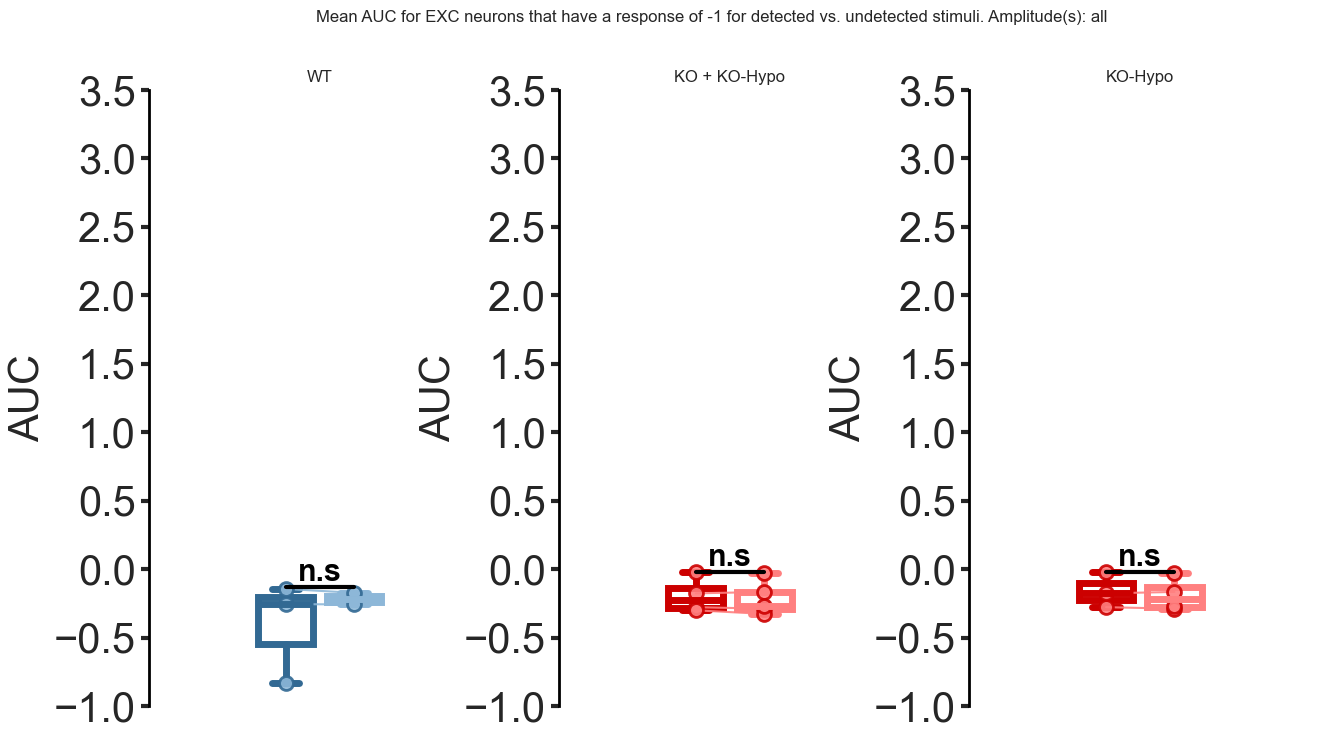

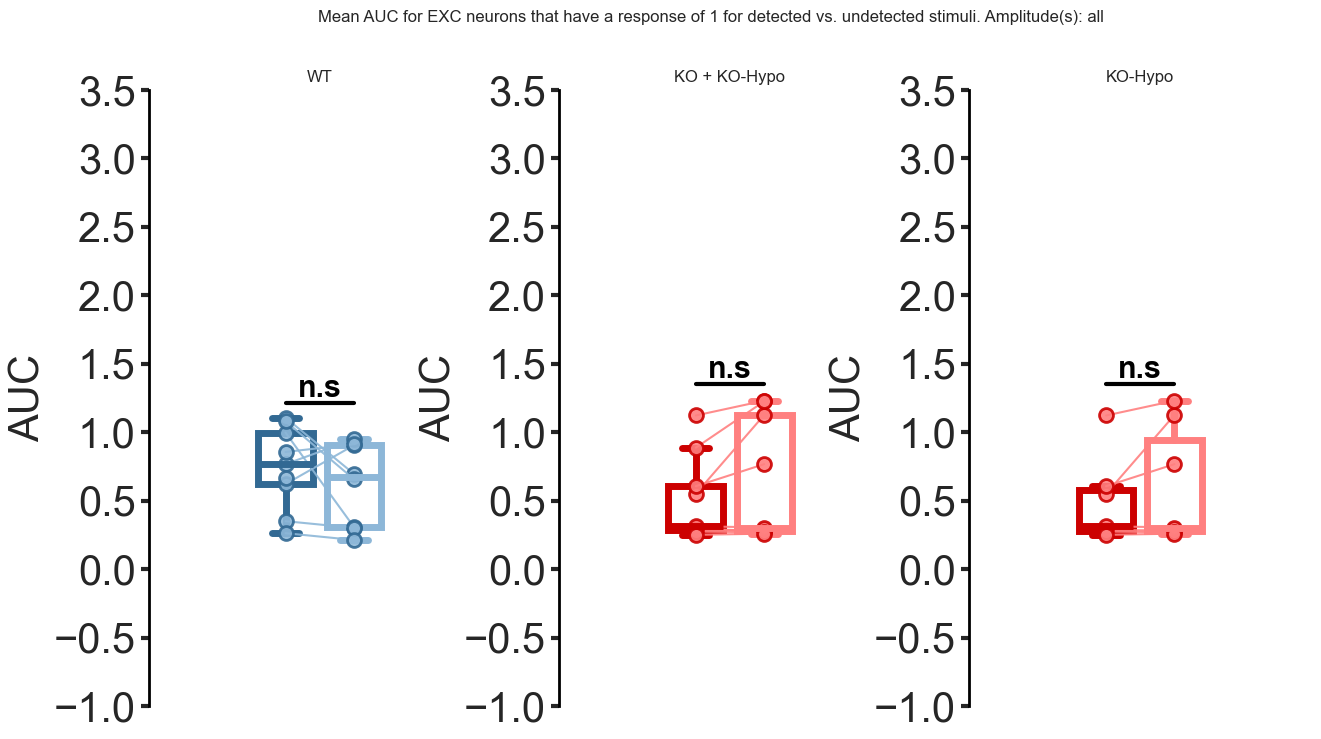

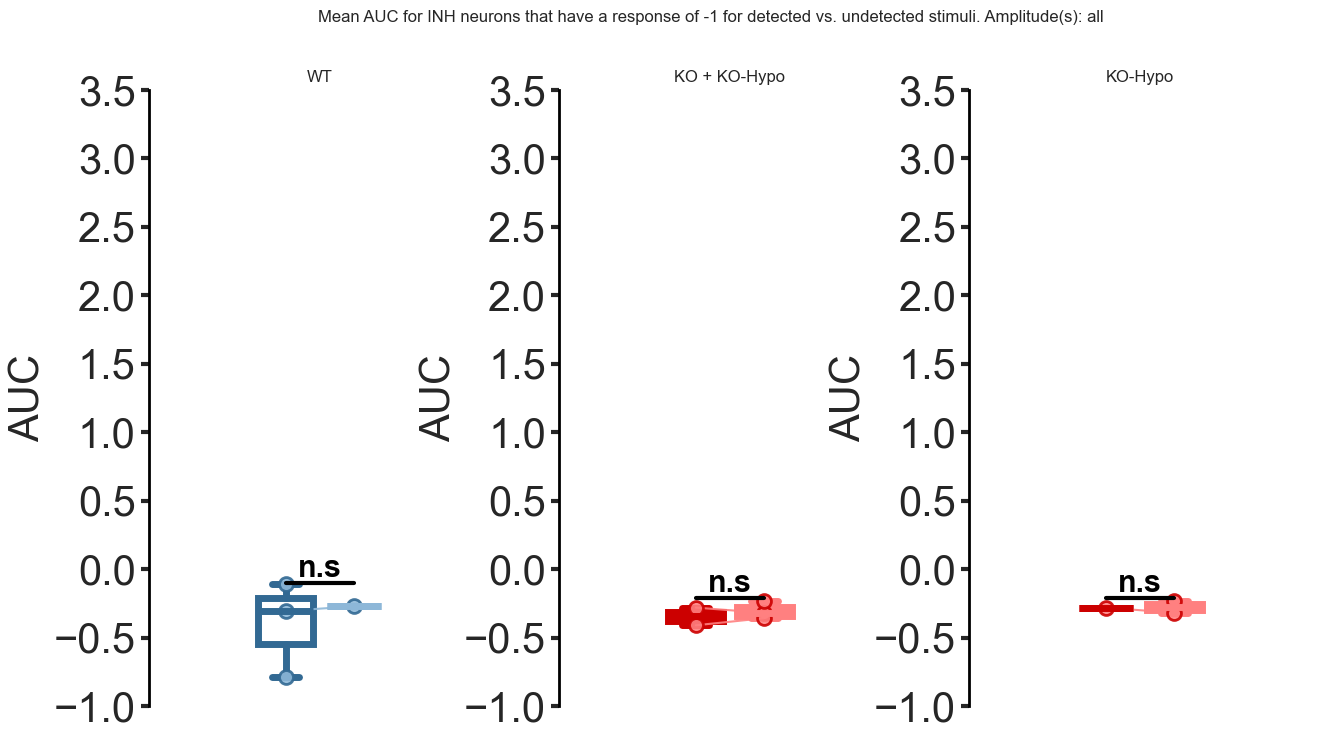

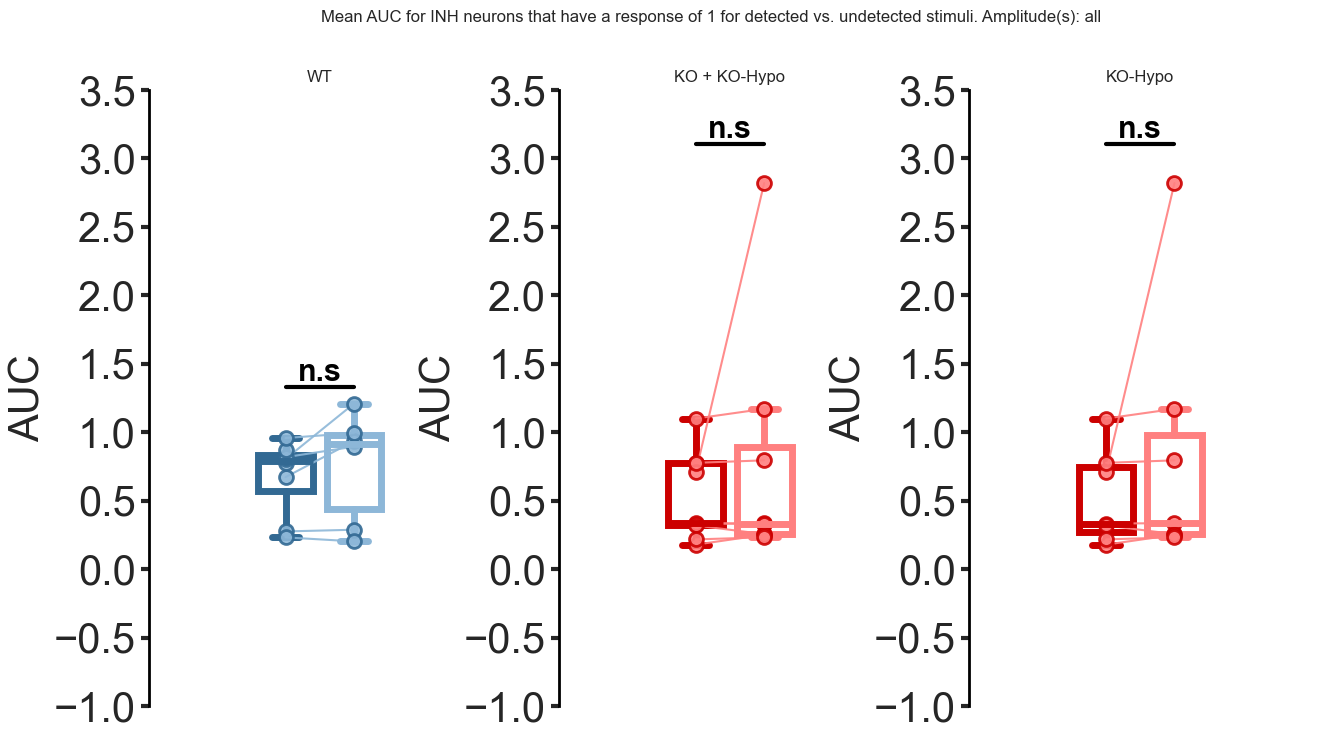

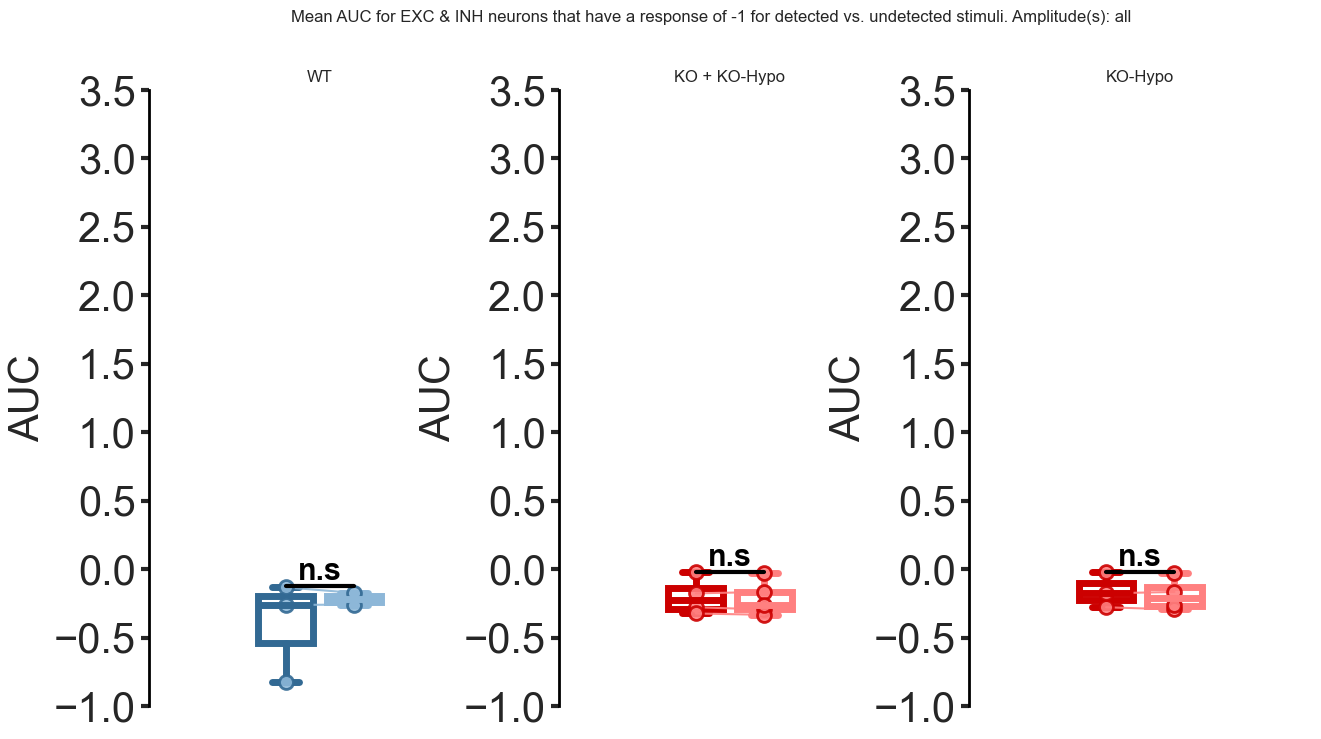

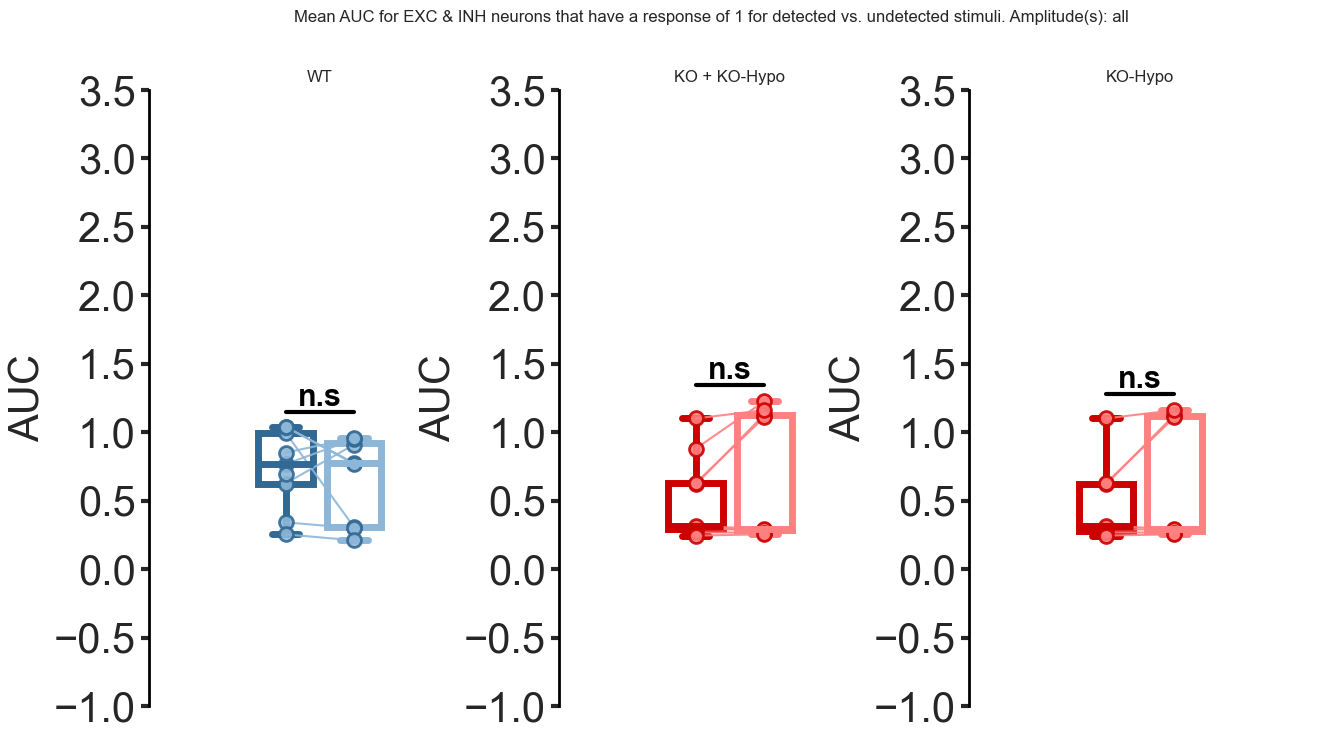

In [11]:
det_comp_param(recs, "AUC", exc_neurons=True, inh_neurons=False, stim_ampl="all", ylim=[-1, 3.5])
det_comp_param(recs, "AUC", exc_neurons=False, inh_neurons=True, stim_ampl="all", ylim=[-1, 3.5])
det_comp_param(recs, "AUC", exc_neurons=True, inh_neurons=True, stim_ampl="all", ylim=[-1, 3.5])

### Threshold amplitude

Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=0.6969645302427002, pvalue=0.0013080070896716047)
ShapiroResult(statistic=0.7825791287803006, pvalue=0.012895611384211959)
WilcoxonResult(statistic=14.0, pvalue=0.359375)
Boxplot plotting.
--- AUC ---
ShapiroResult(statistic=0.6139485237853626, pvalue=0.0003963814143324269)
ShapiroResult(statistic=0.7931907890588425, pvalue=0.03

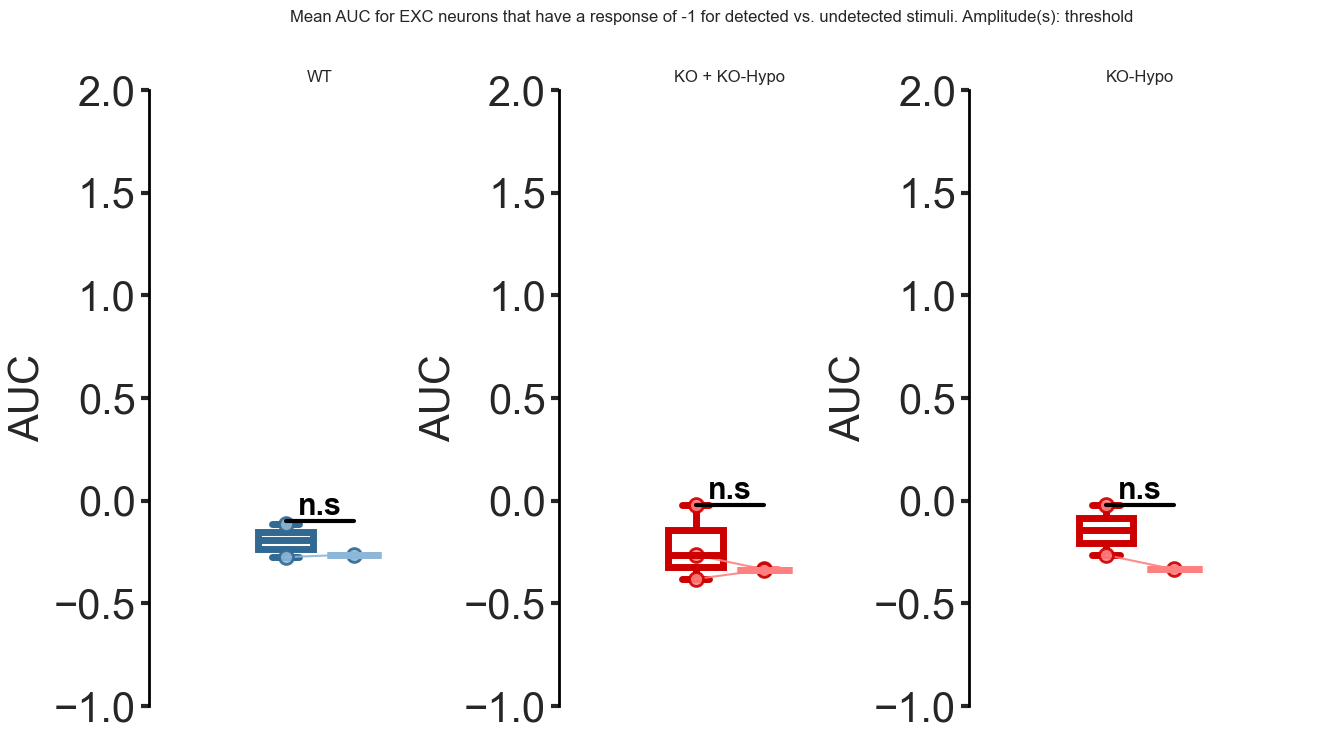

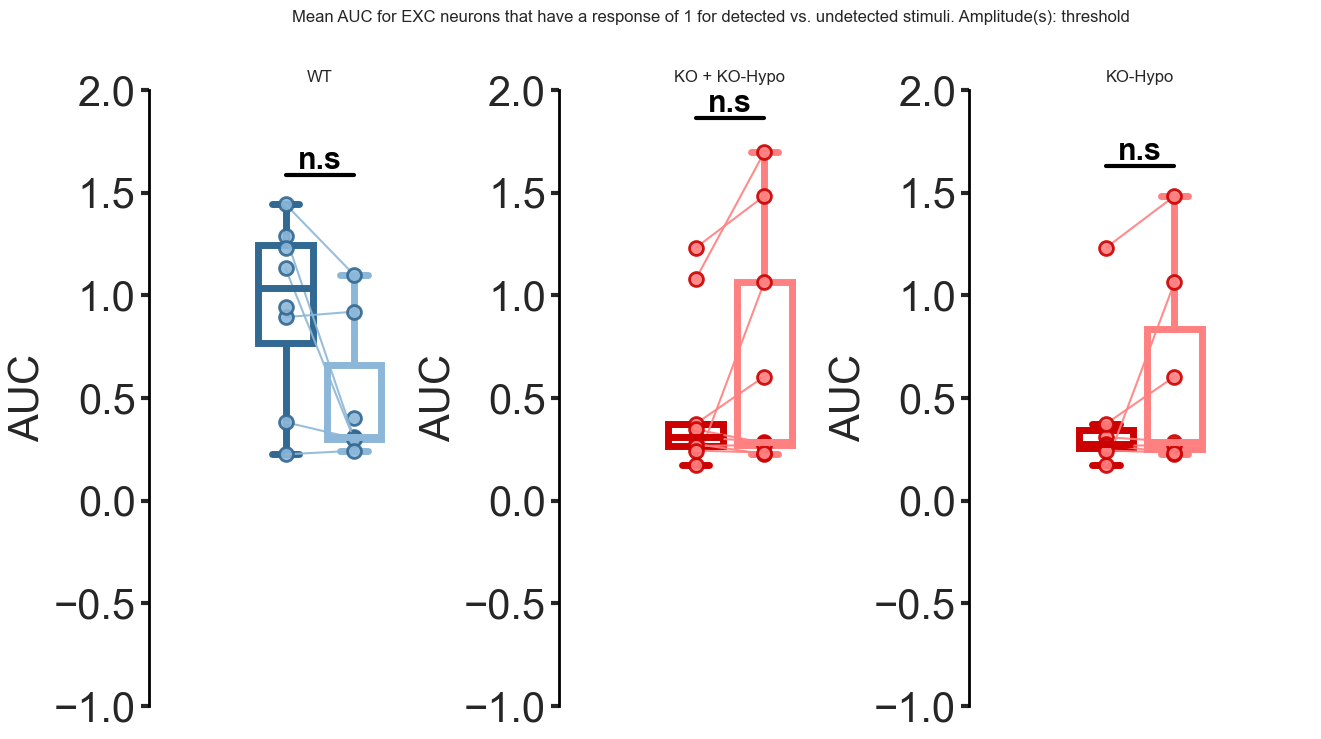

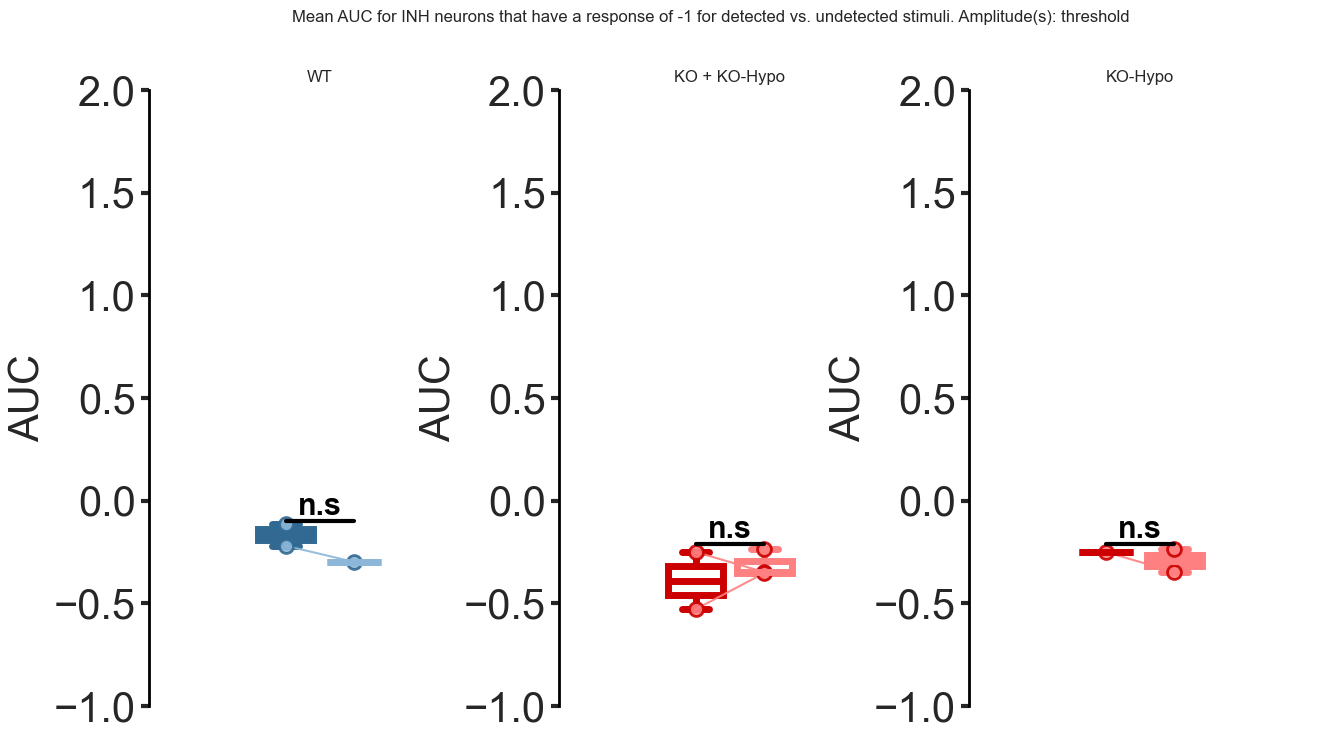

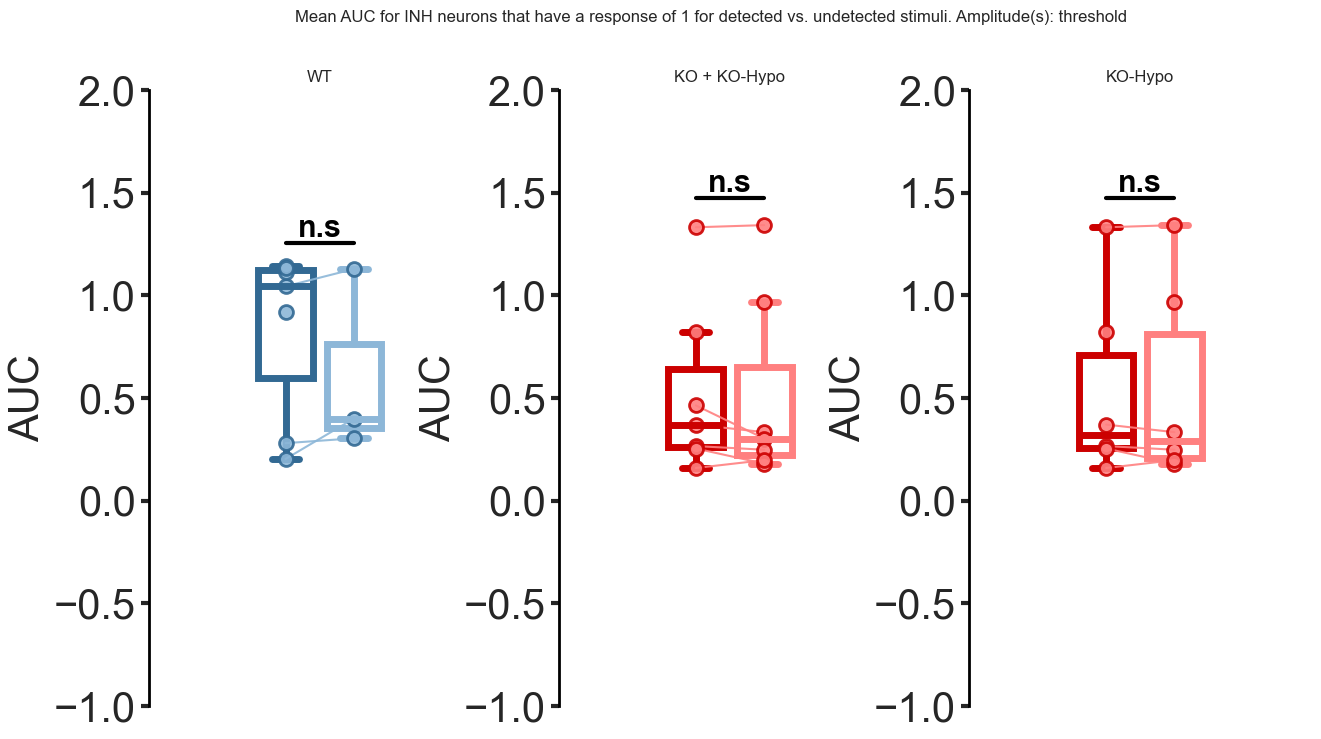

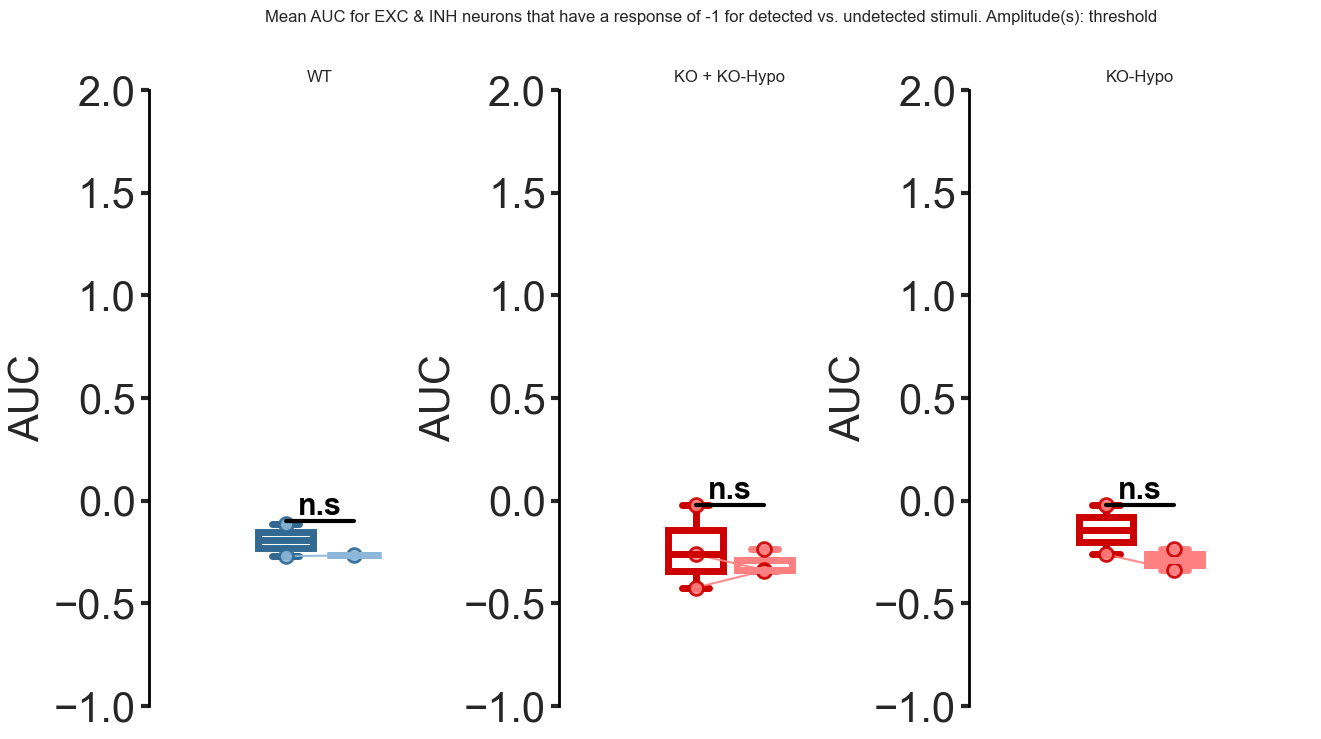

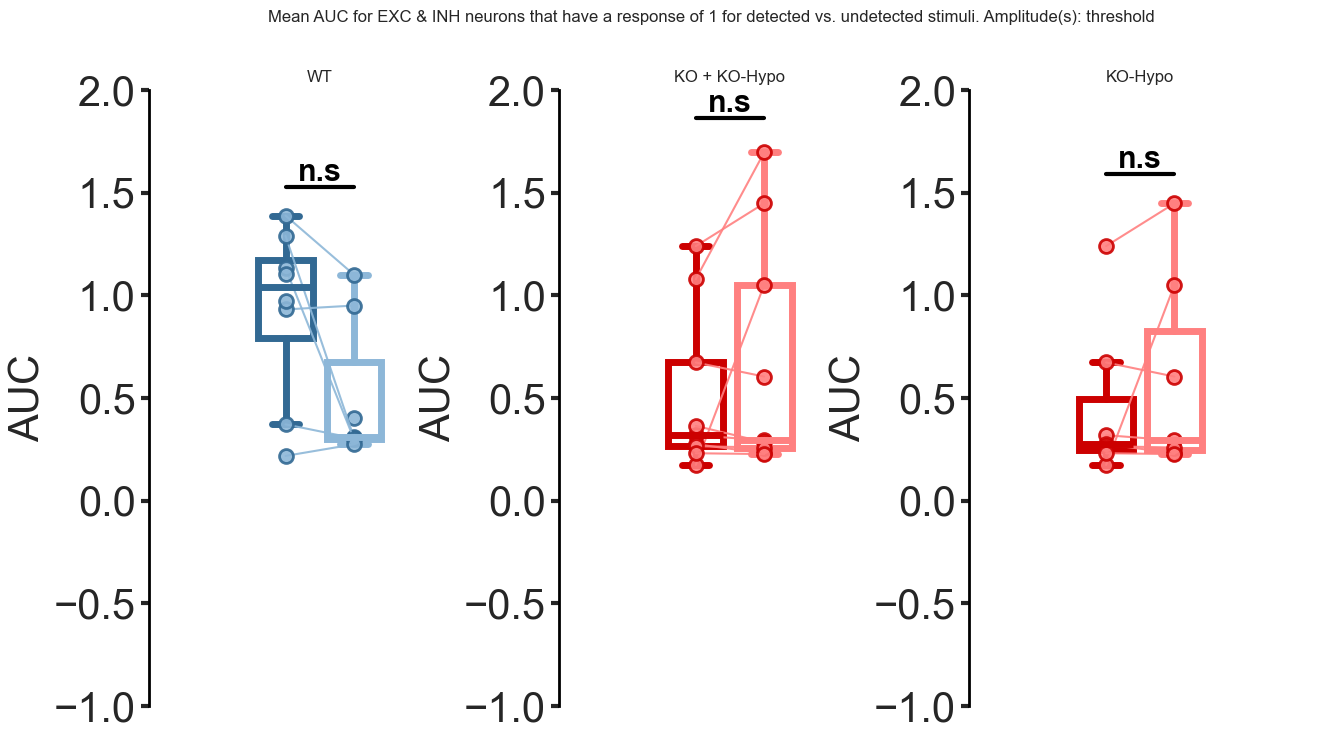

In [12]:
det_comp_param(recs, "AUC", exc_neurons=True, inh_neurons=False, stim_ampl="threshold", ylim=[-1, 2])
det_comp_param(recs, "AUC", exc_neurons=False, inh_neurons=True, stim_ampl="threshold", ylim=[-1, 2])
det_comp_param(recs, "AUC", exc_neurons=True, inh_neurons=True, stim_ampl="threshold", ylim=[-1, 2])

## Peak delay

### All amplitudes

Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=0.9287092678941377, pvalue=0.4691534968263089)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=0.9368030227000131, pvalue=0.5486775072315941)
ShapiroResult(statistic=0.939736800498974, pvalue=0.5791306567405785)
TtestResult(statistic=-0.02522120976282695, pvalue=0.9804962919440943, df=8)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=0.87110519

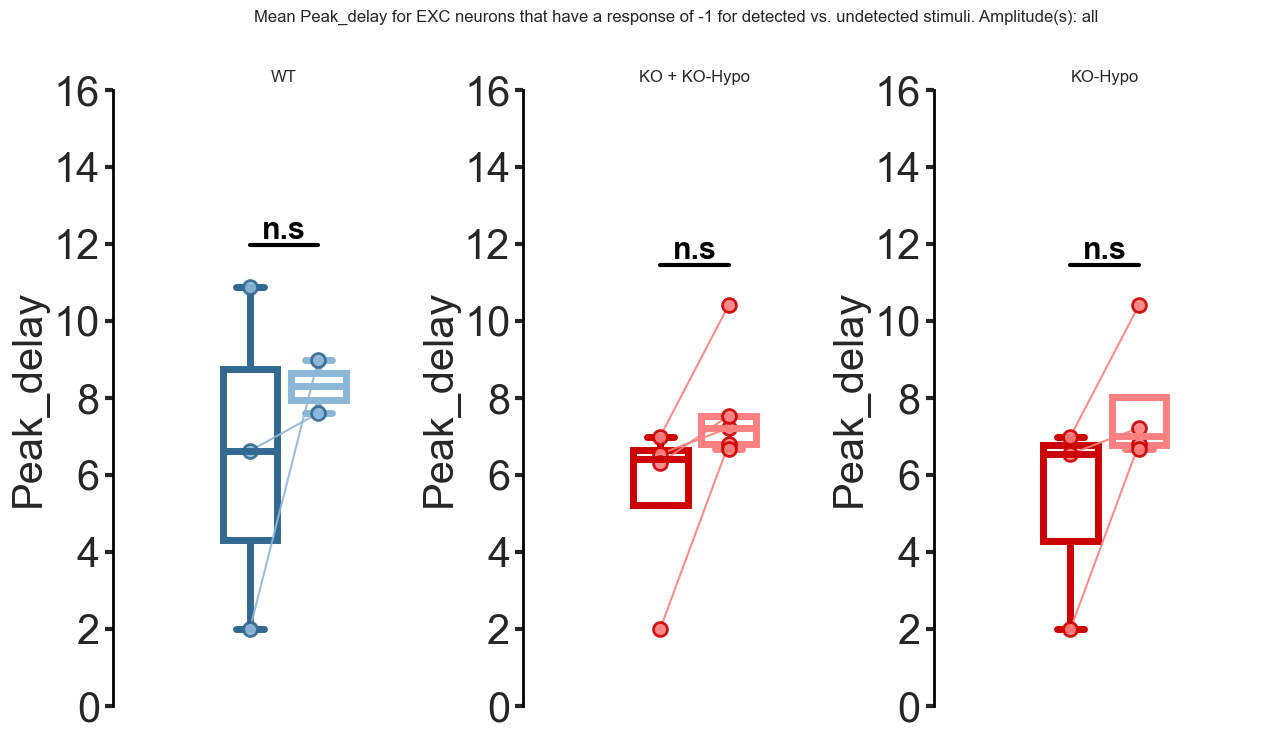

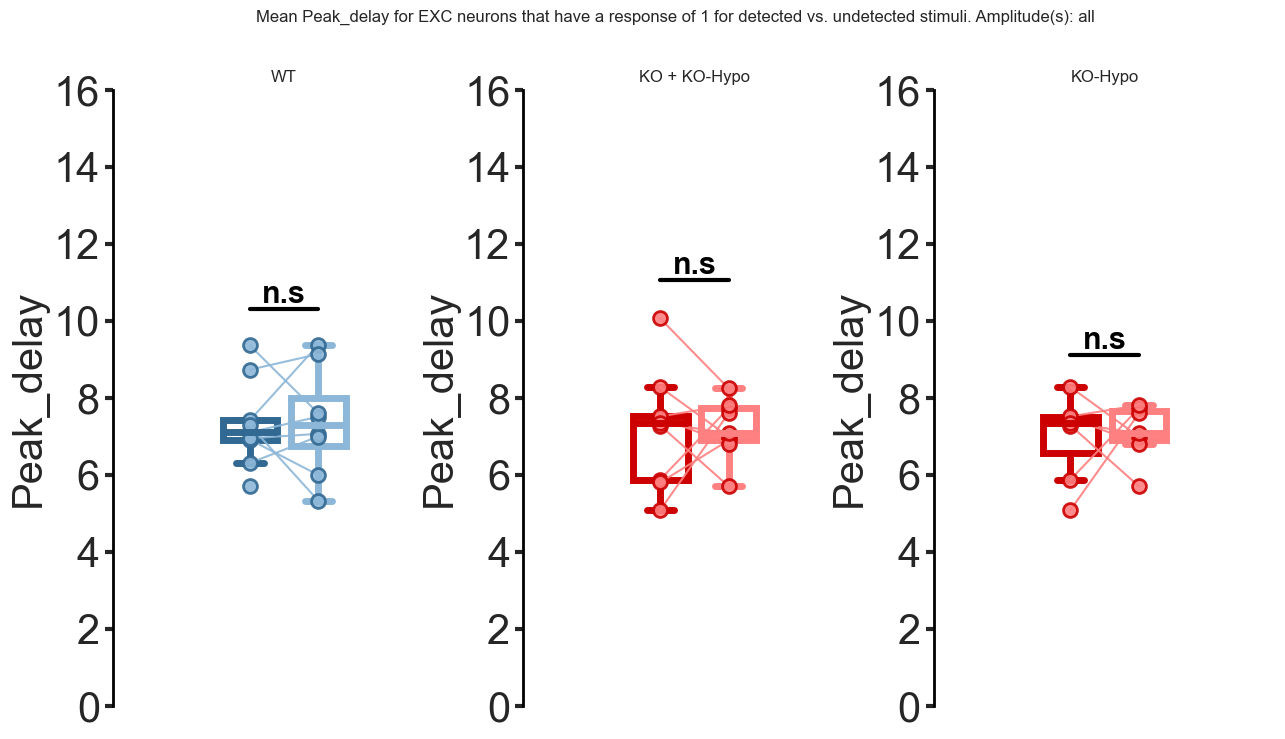

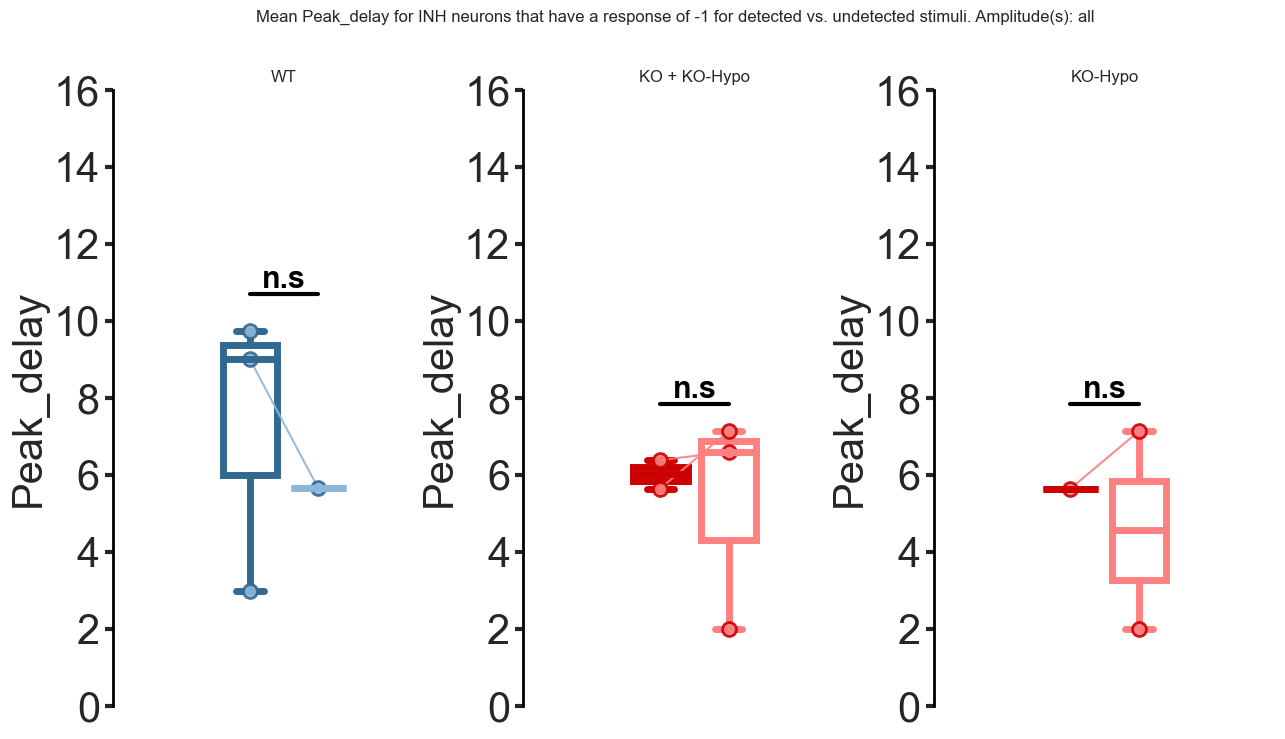

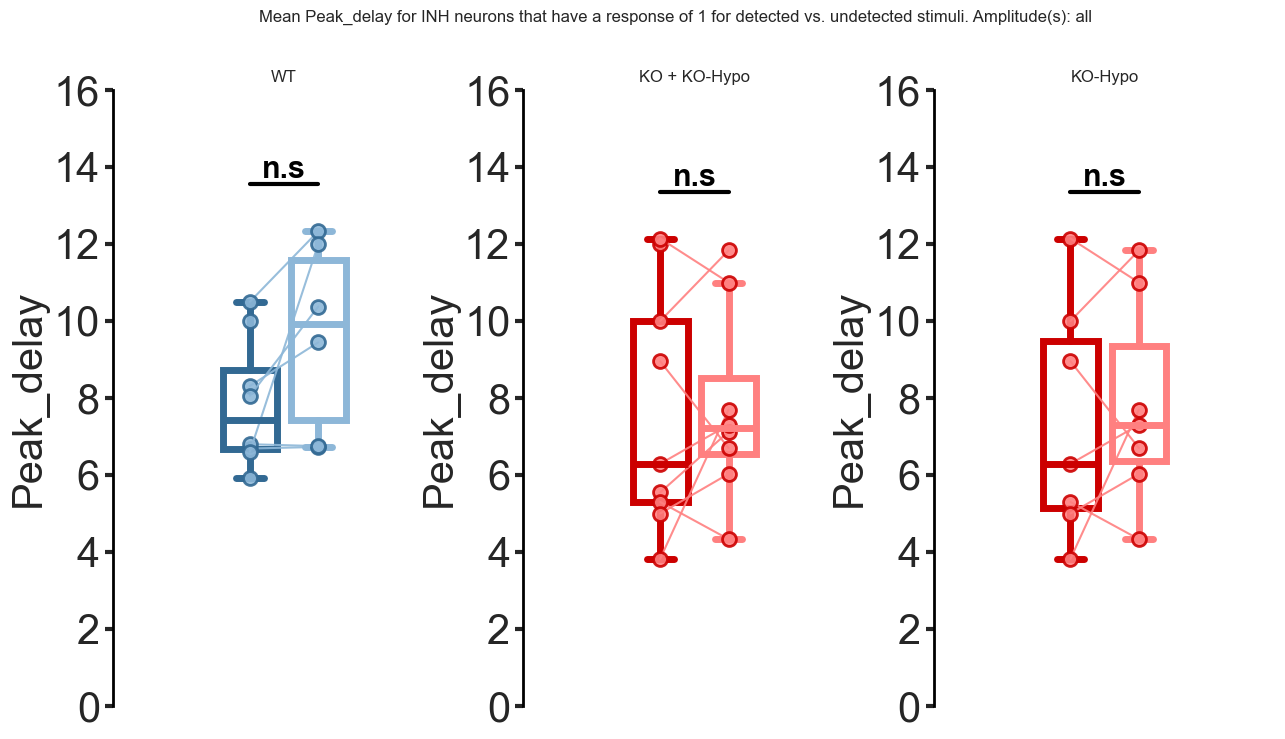

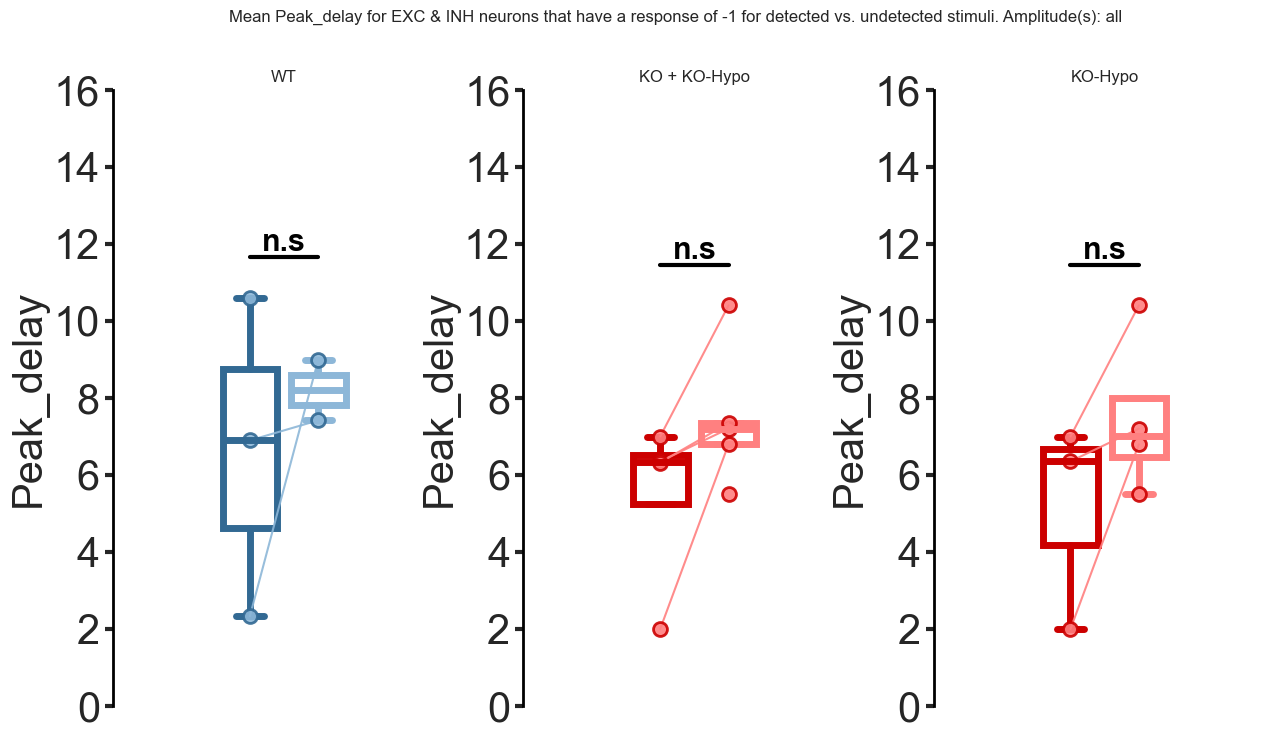

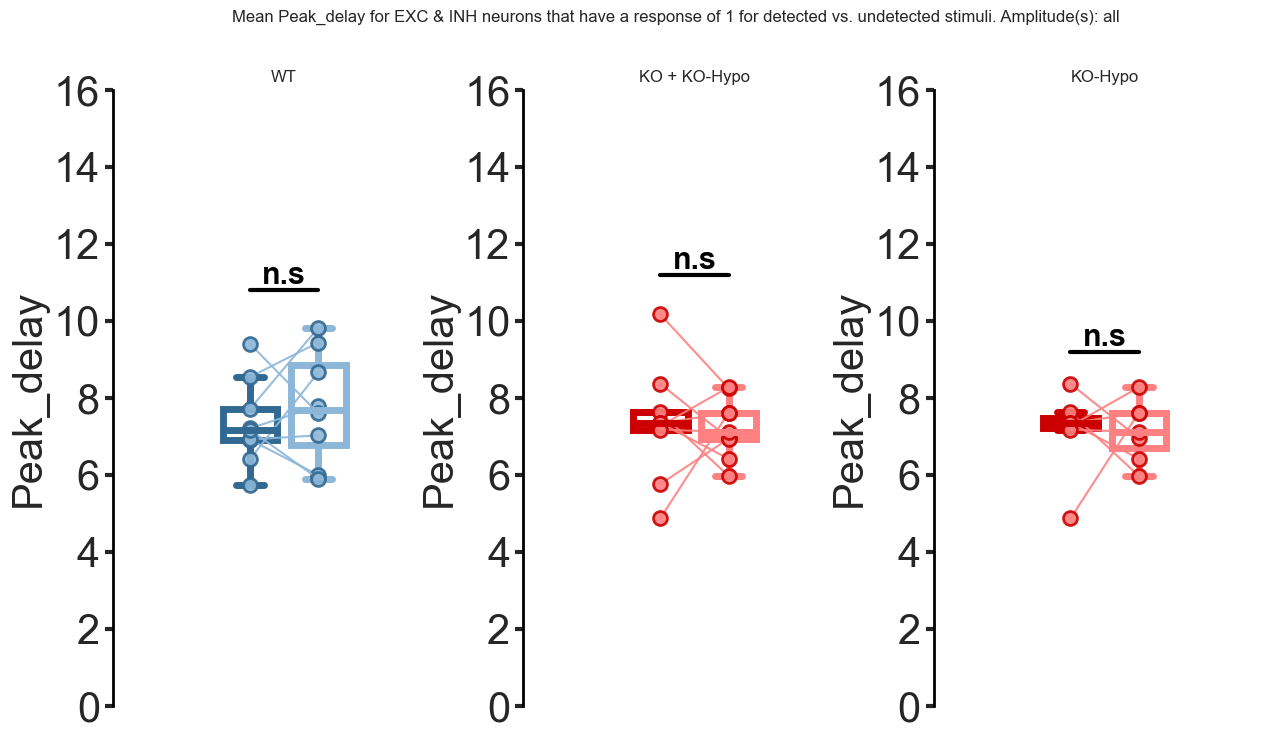

In [13]:
det_comp_param(recs, "Peak_delay", exc_neurons=True, inh_neurons=False, stim_ampl="all", ylim=[1, 15])
det_comp_param(recs, "Peak_delay", exc_neurons=False, inh_neurons=True, stim_ampl="all", ylim=[1, 15])
det_comp_param(recs, "Peak_delay", exc_neurons=True, inh_neurons=True, stim_ampl="all", ylim=[1, 15])

### Threshold amplitude

Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=0.8985105598490115, pvalue=0.24349255692379174)
ShapiroResult(statistic=0.909672817106797, pvalue=0.31359128330838315)
TtestResult(statistic=0.5532062278816406, pvalue=0.5952394151652591, df=8)
Boxplot plotting.
--- Peak_delay ---
ShapiroResult(statistic=0.8902280065722159, pvalue=0.27585504064

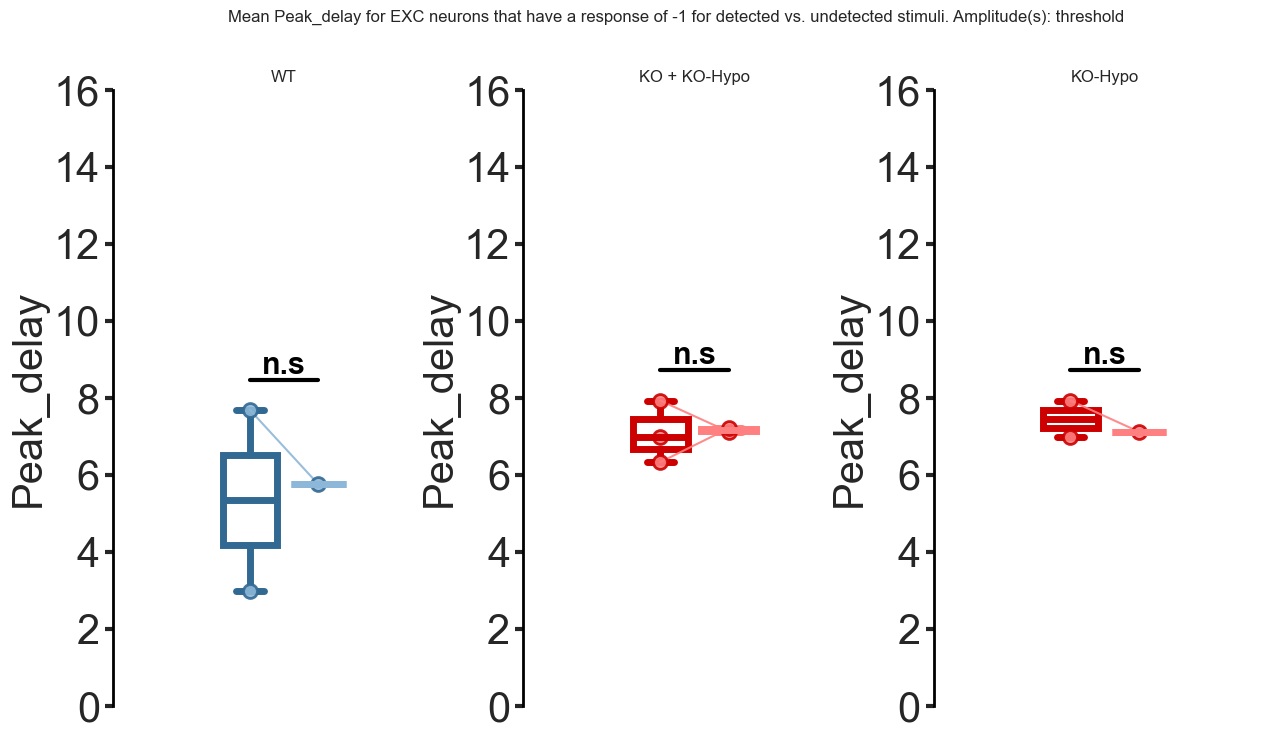

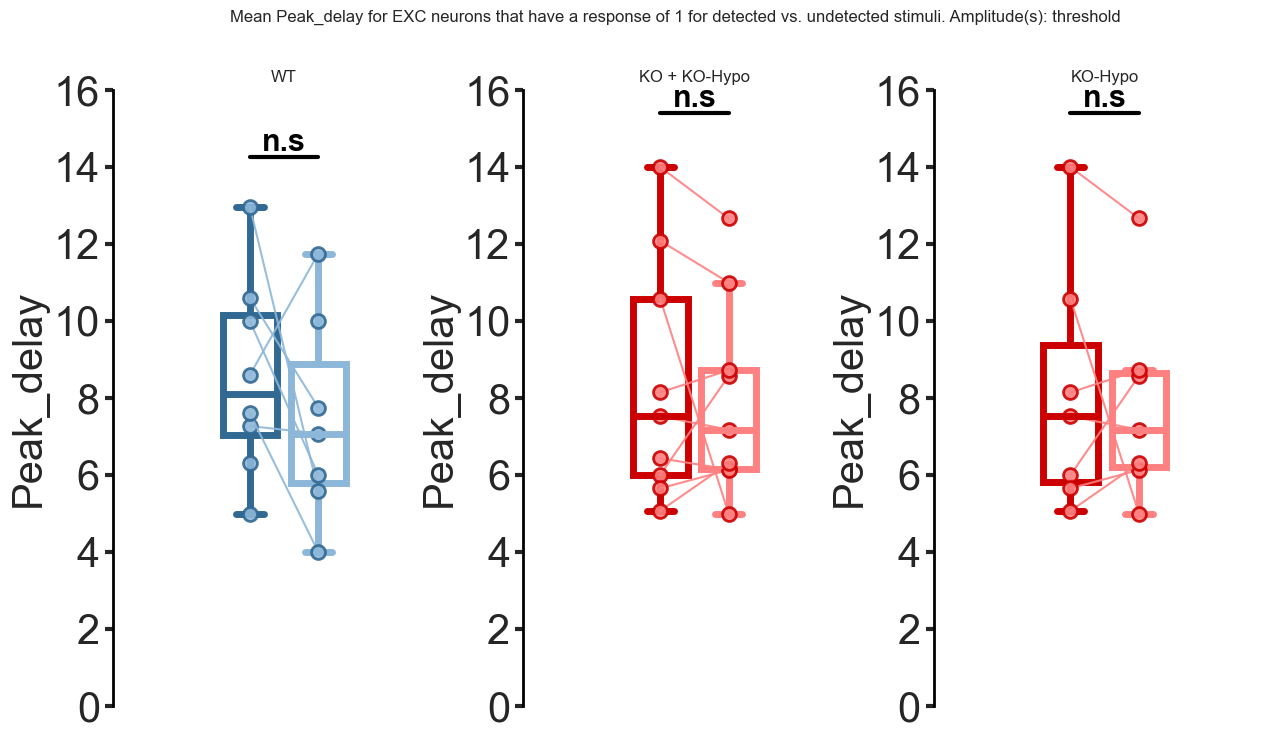

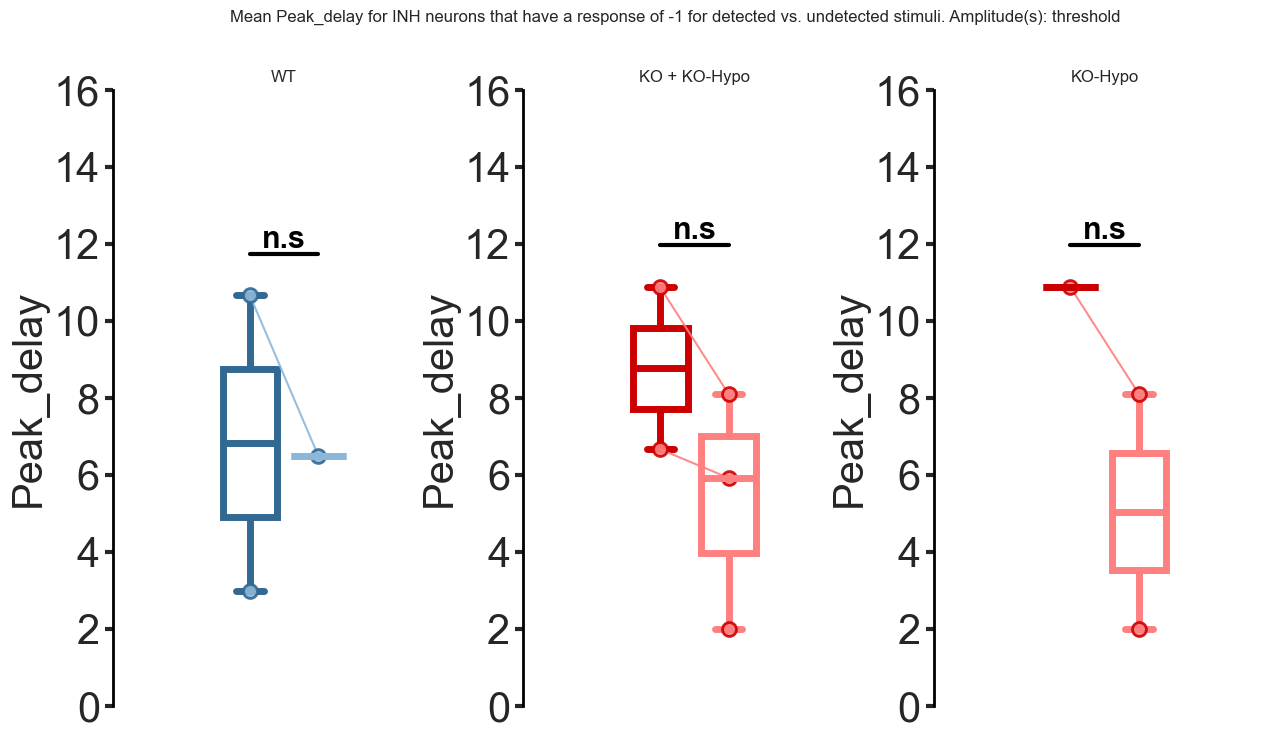

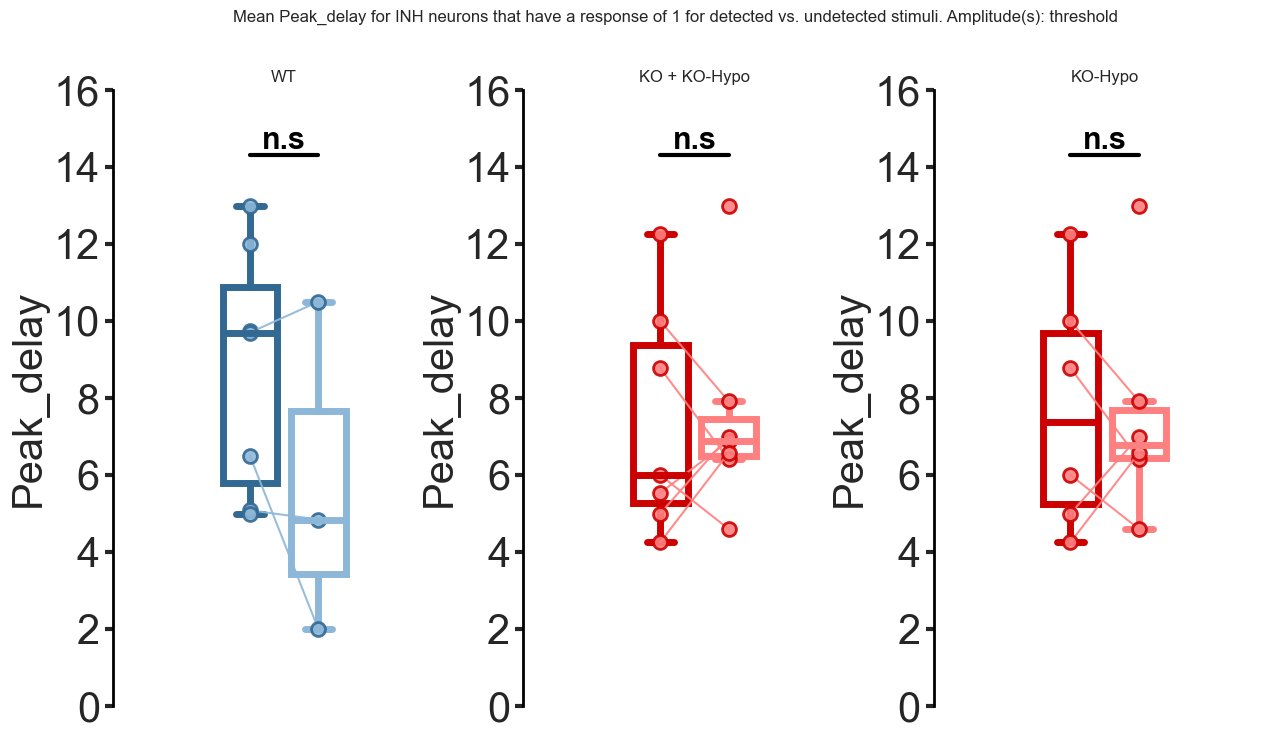

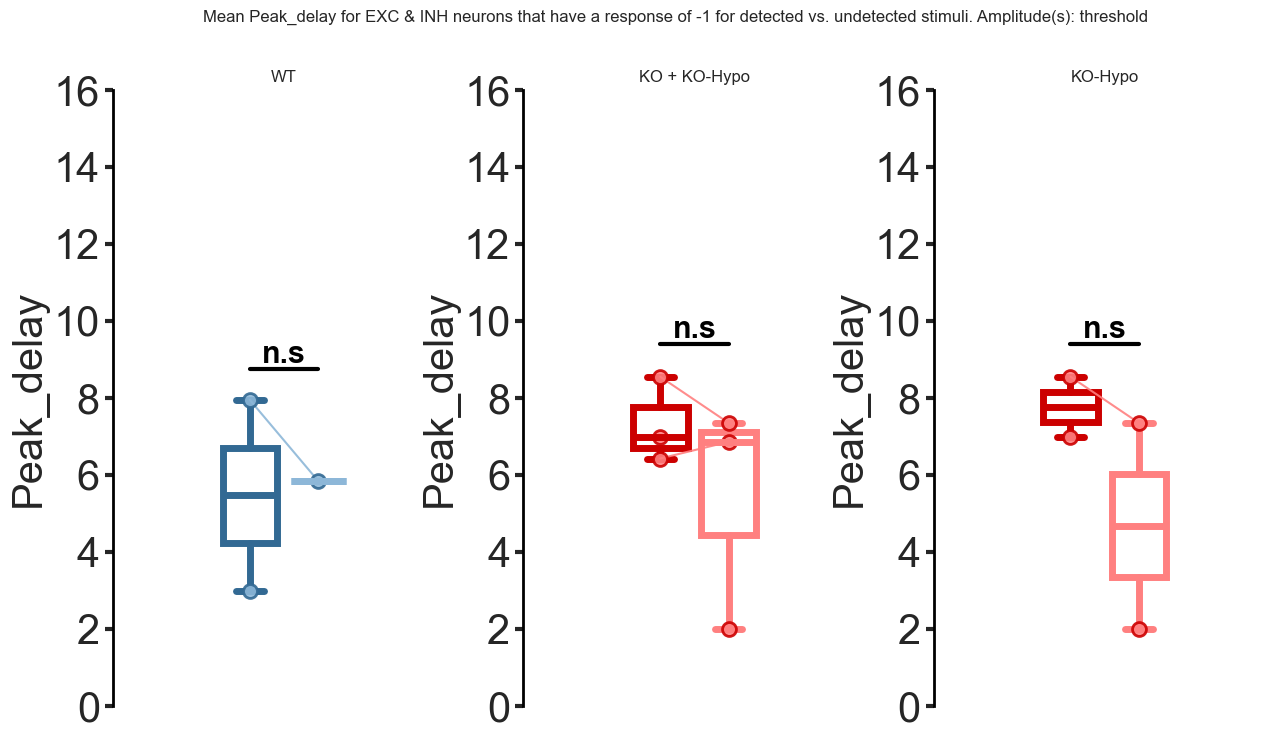

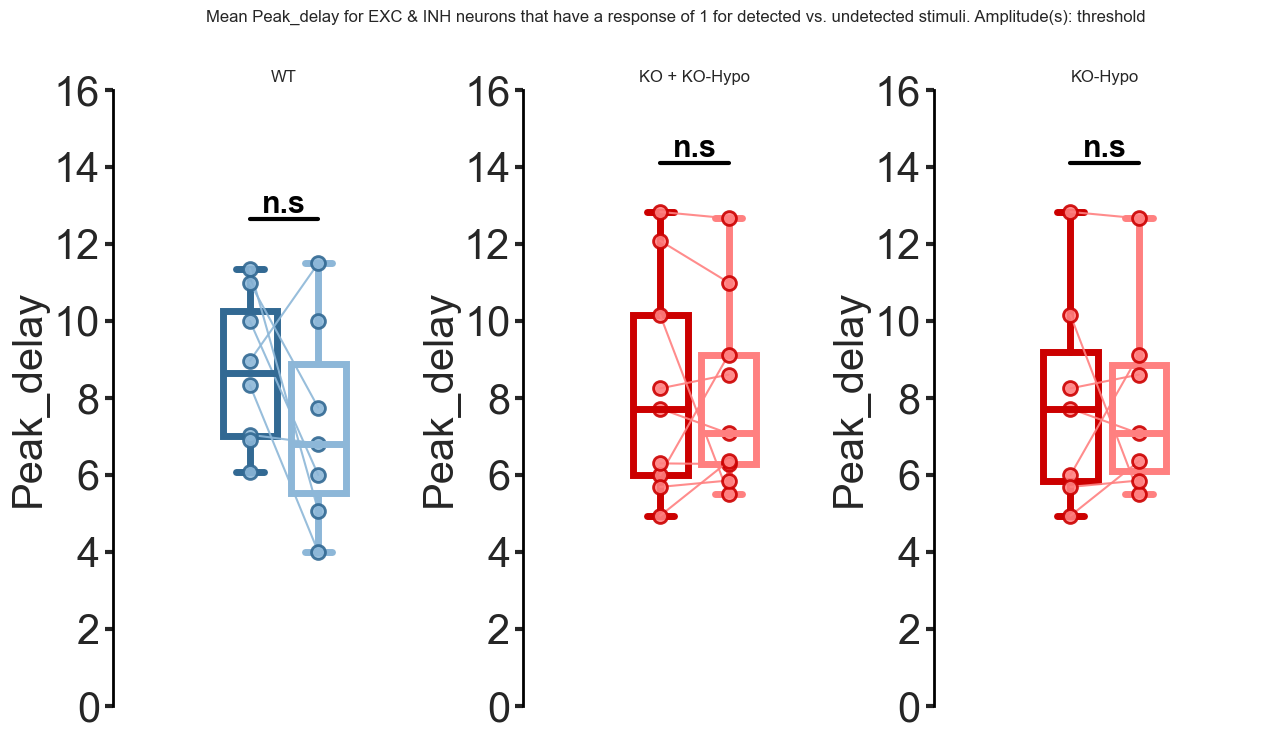

In [14]:
det_comp_param(recs, "Peak_delay", exc_neurons=True, inh_neurons=False, stim_ampl="threshold", ylim=[1, 15])
det_comp_param(recs, "Peak_delay", exc_neurons=False, inh_neurons=True, stim_ampl="threshold", ylim=[1, 15])
det_comp_param(recs, "Peak_delay", exc_neurons=True, inh_neurons=True, stim_ampl="threshold", ylim=[1, 15])

## Peak amplitude

### All amplitudes

Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=0.7180817565266975, pvalue=0.0023067656679965154)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=0.9254132804037403, pvalue=0.43892977205948086)
ShapiroResult(statistic=0.8946063810353179, pvalue=0.22236817317814267)
TtestResult(statistic=-0.738240971606417, pvalue=0.4814606745966331, df=8)
Boxplot plotting.
--- Peak_amplitude ---
Shapir

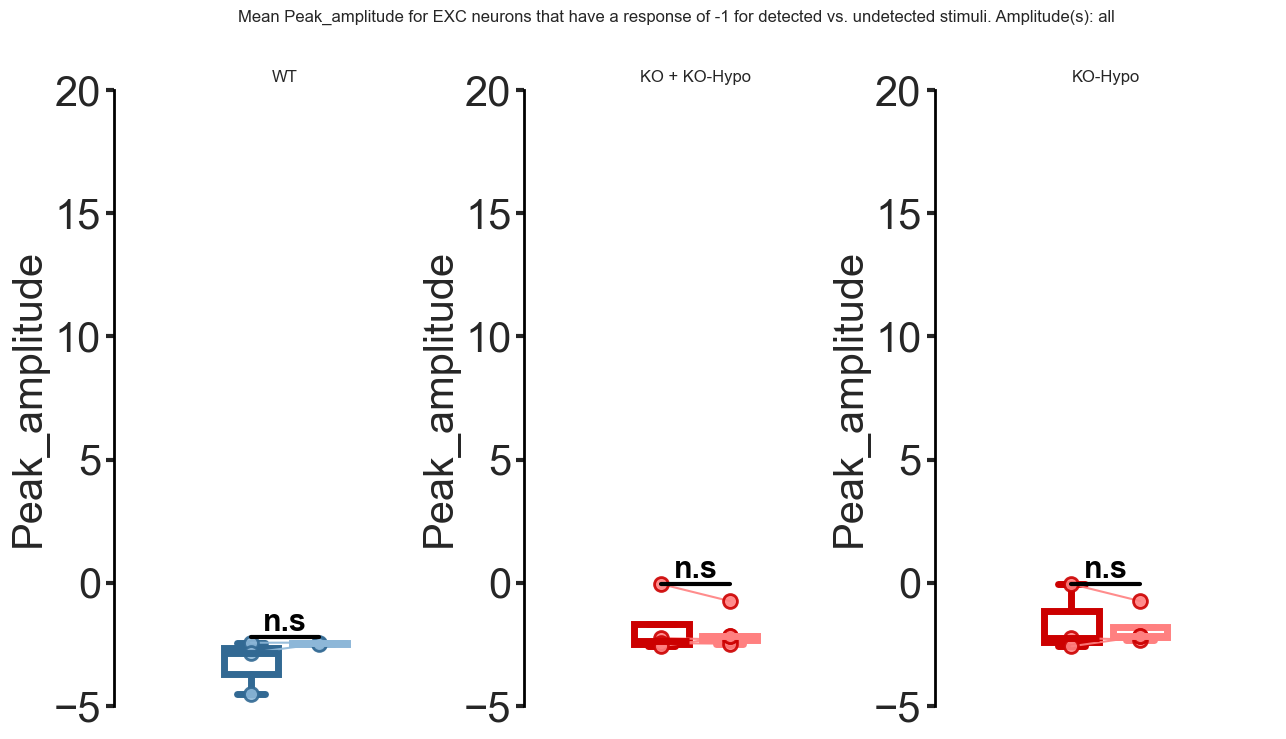

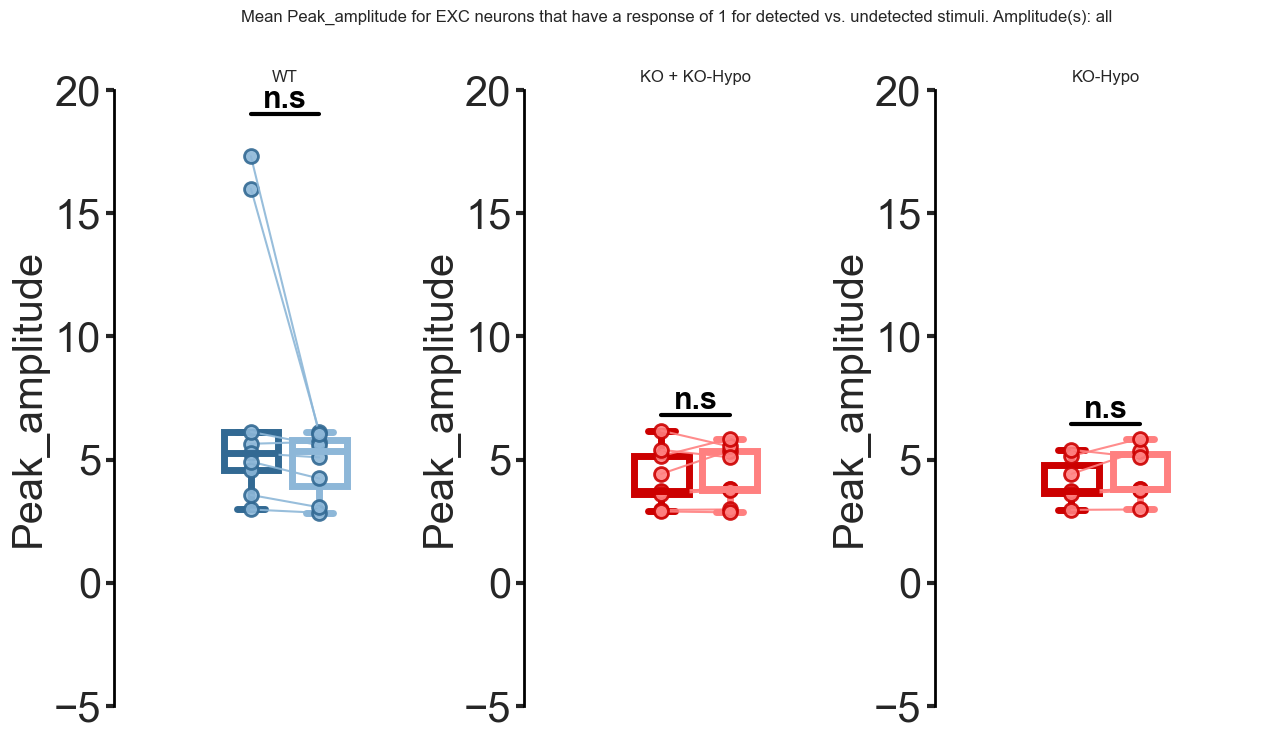

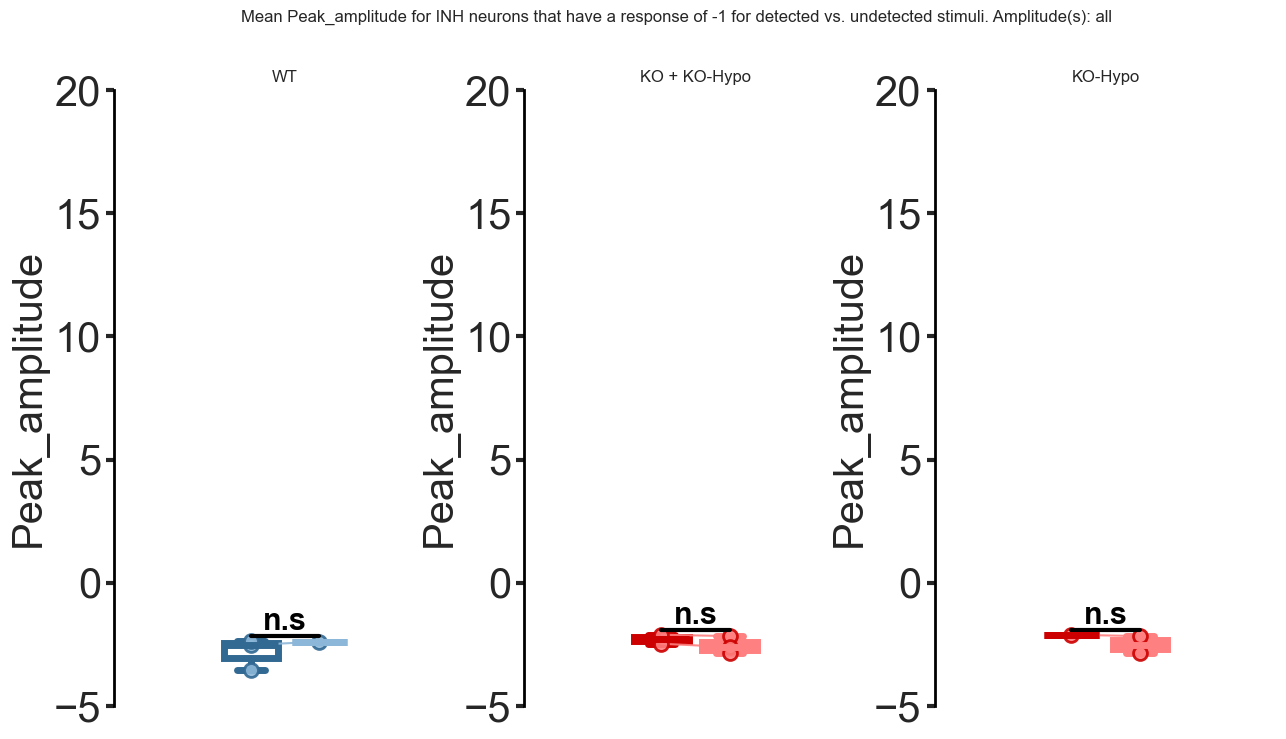

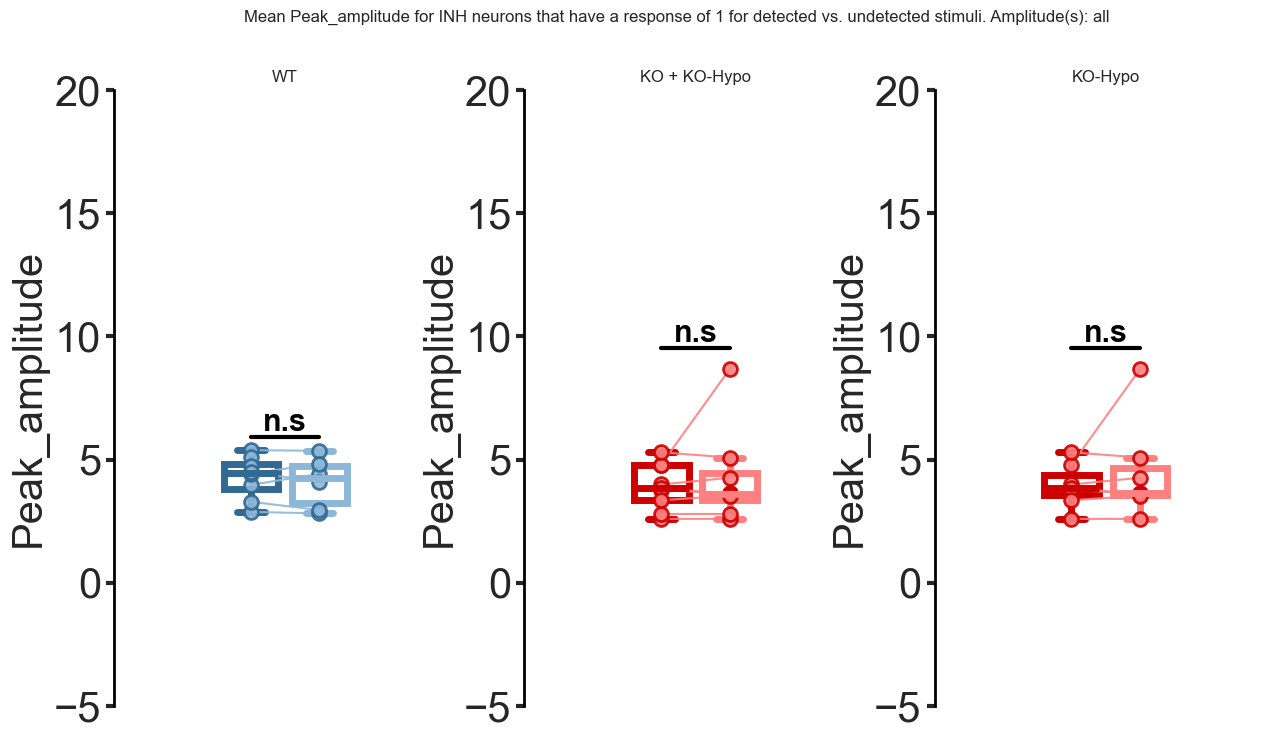

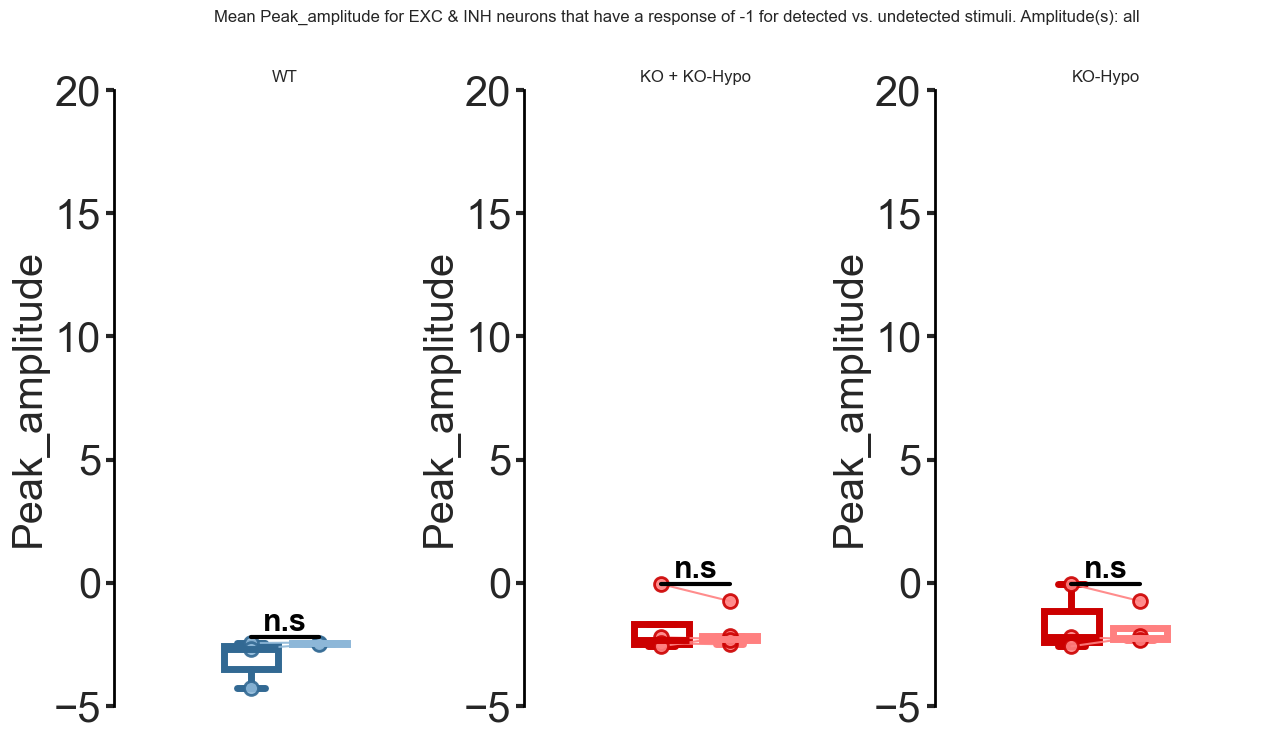

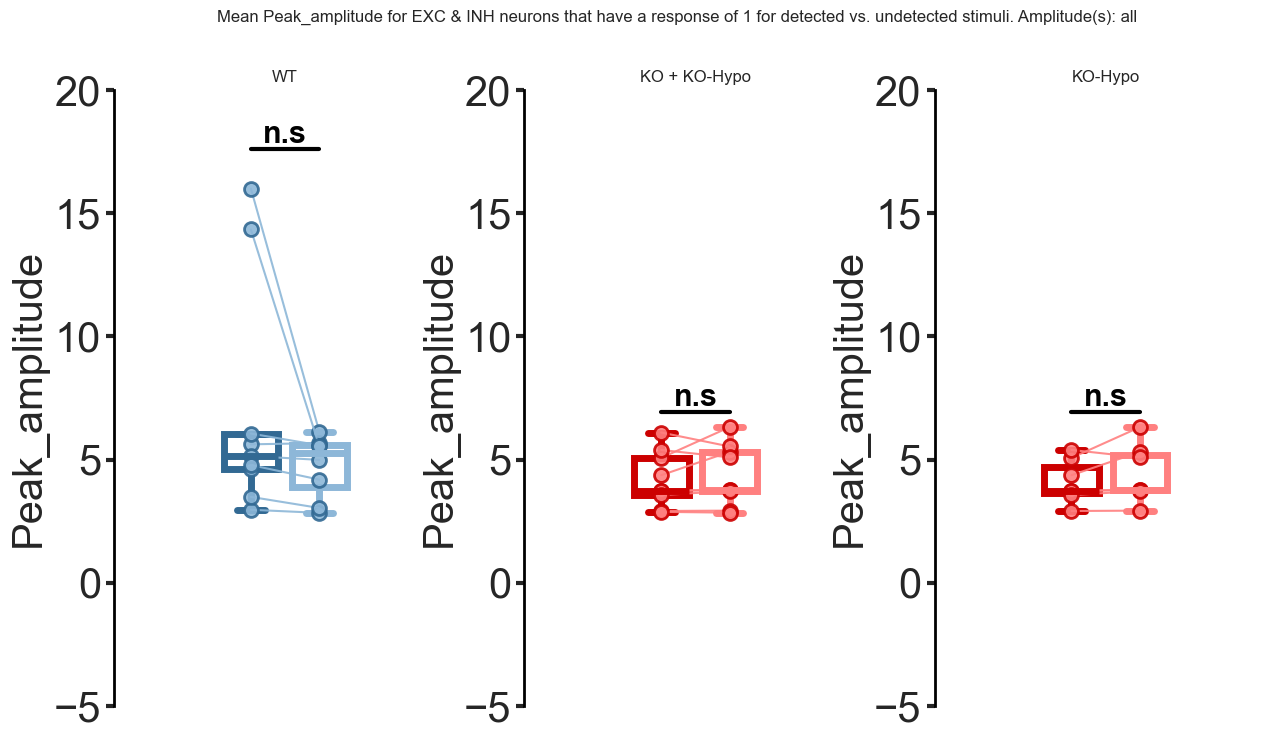

In [15]:
det_comp_param(recs, "Peak_amplitude", exc_neurons=True, inh_neurons=False, stim_ampl="all", ylim=[-5, 20])
det_comp_param(recs, "Peak_amplitude", exc_neurons=False, inh_neurons=True, stim_ampl="all", ylim=[-5, 20])
det_comp_param(recs, "Peak_amplitude", exc_neurons=True, inh_neurons=True, stim_ampl="all", ylim=[-5, 20])

### Threshold amplitude

Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=0.9060243882537626, pvalue=0.28903200099964044)
ShapiroResult(statistic=0.8834784379785632, pvalue=0.17077169724595948)
TtestResult(statistic=-1.3284836365633401, pvalue=0.22066323446280986, df=8)
Boxplot plotting.
--- Peak_amplitude ---
ShapiroResult(statistic=0.91379357110

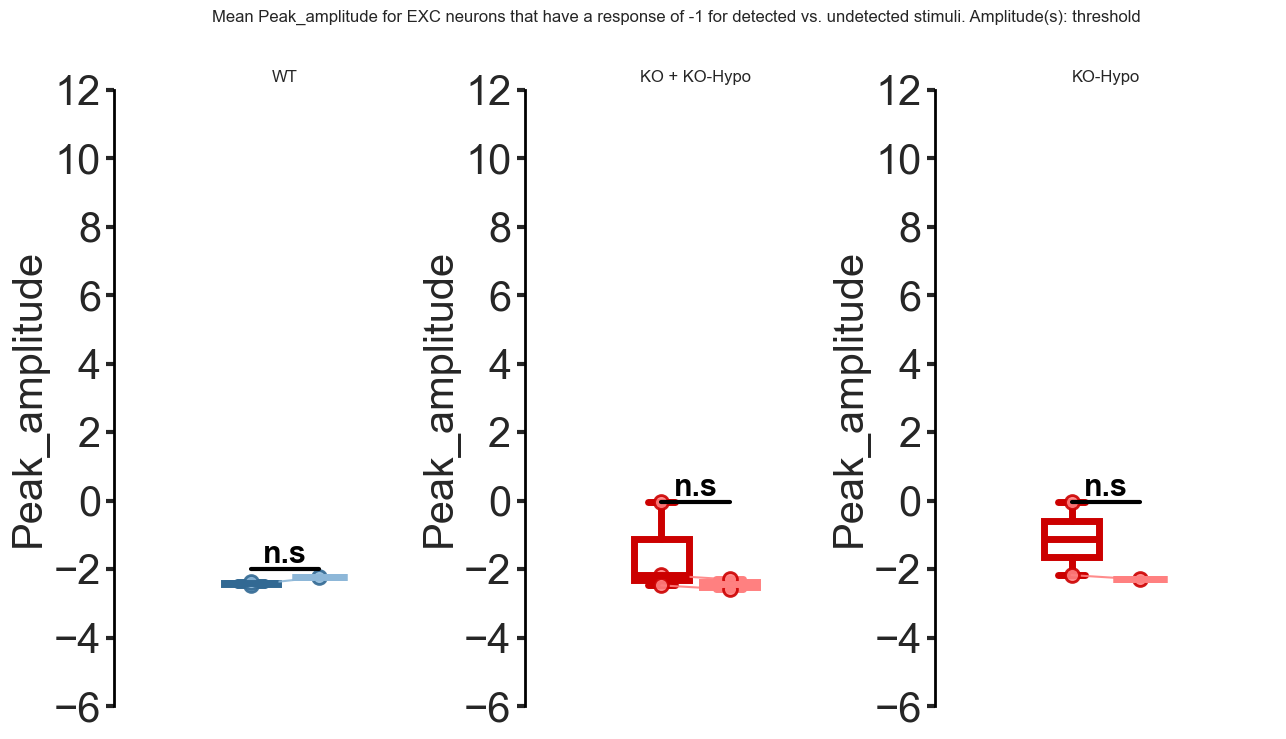

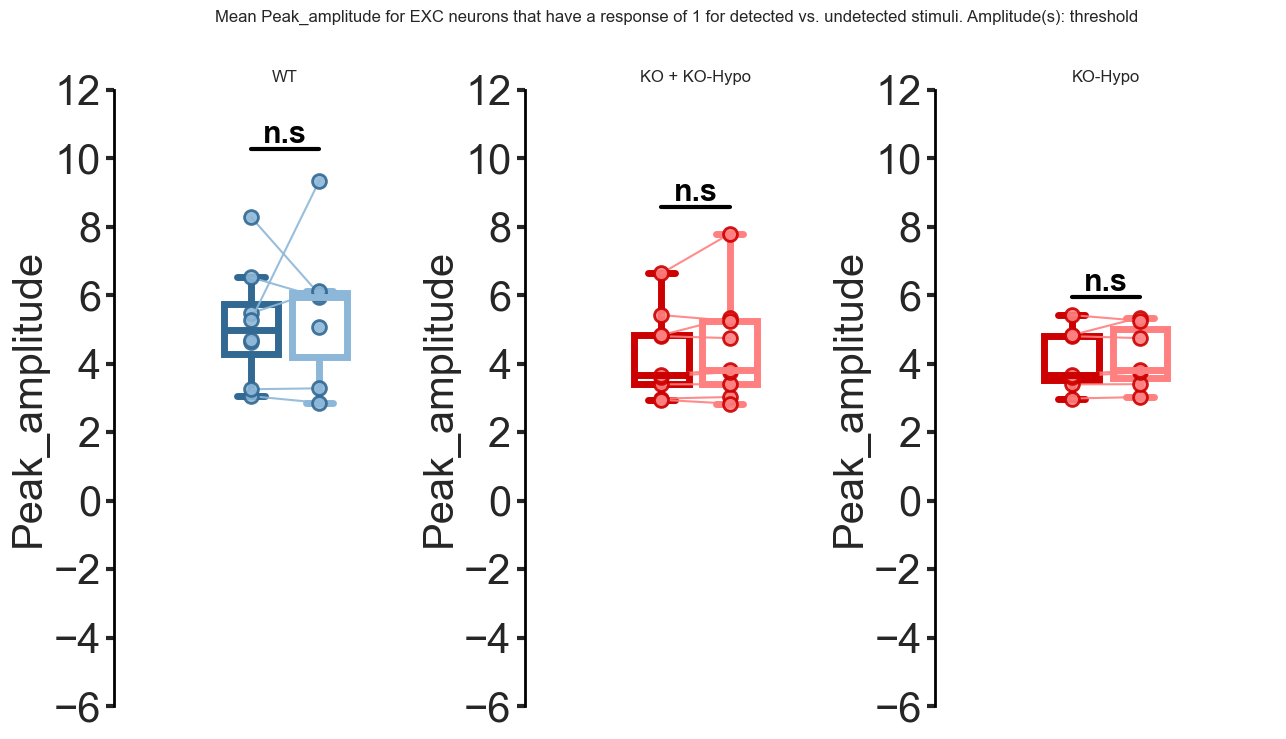

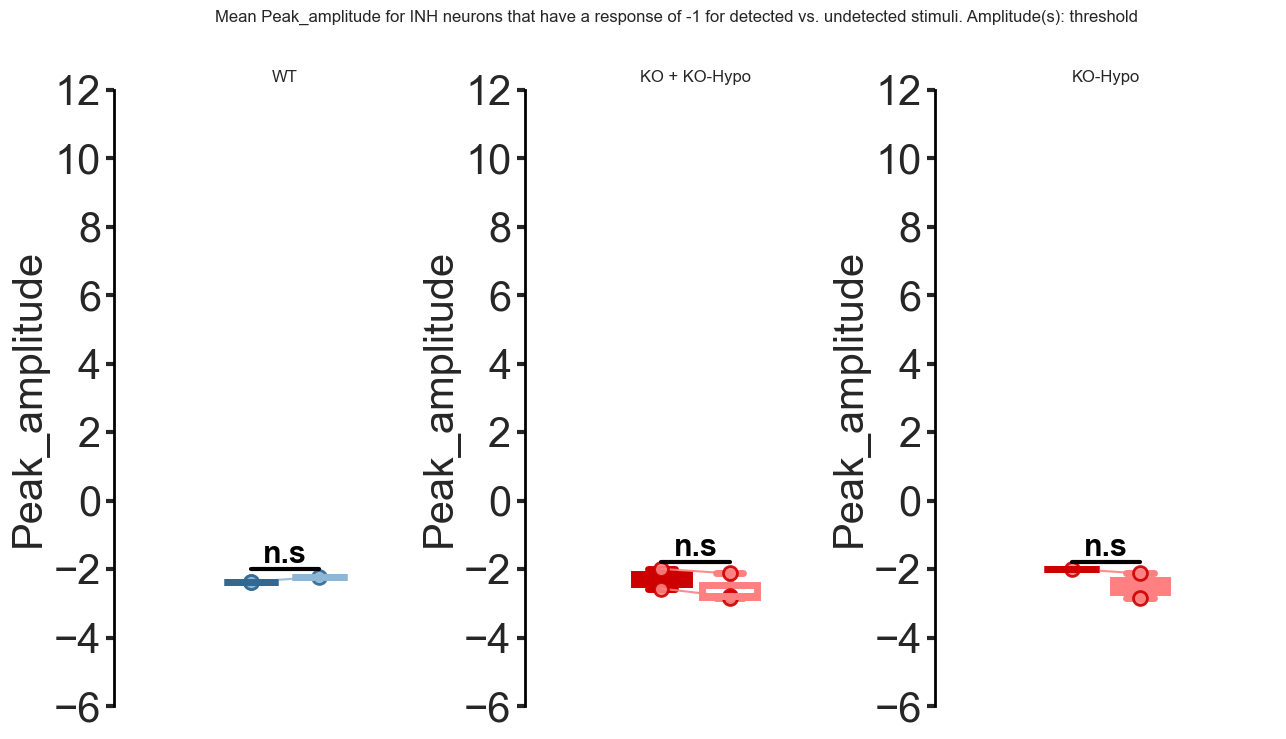

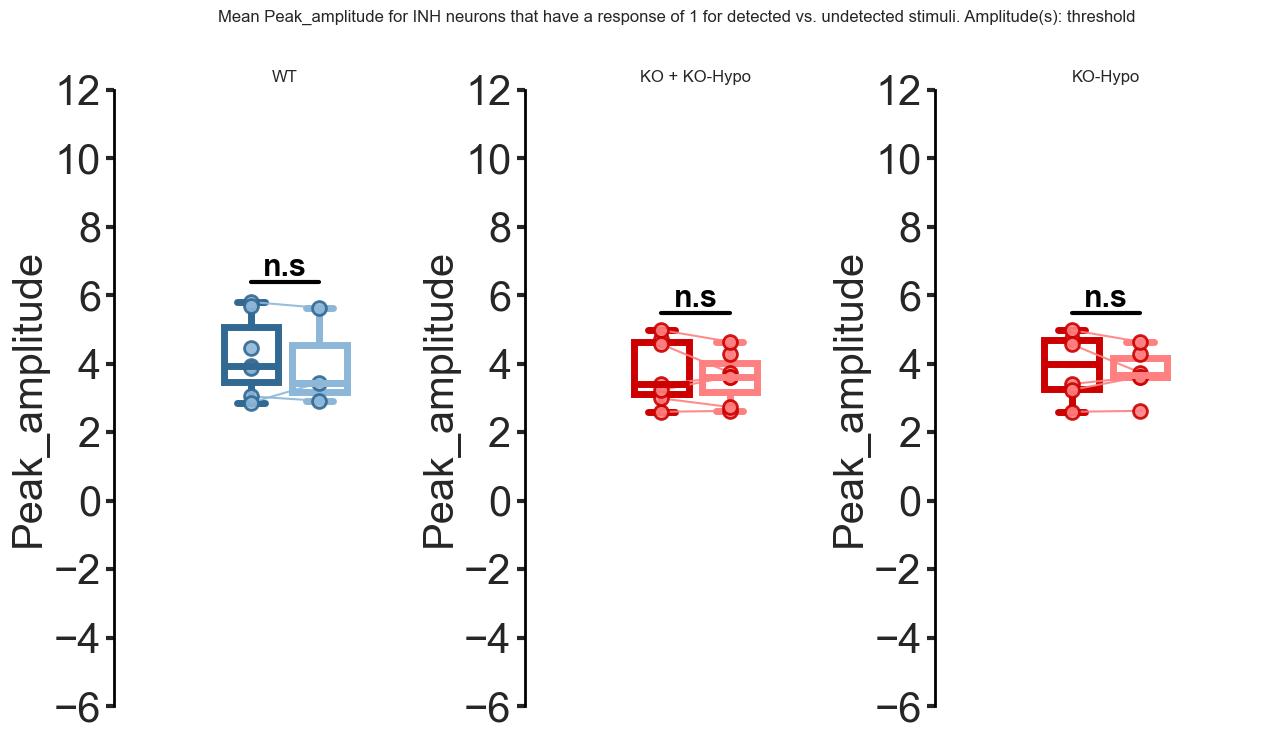

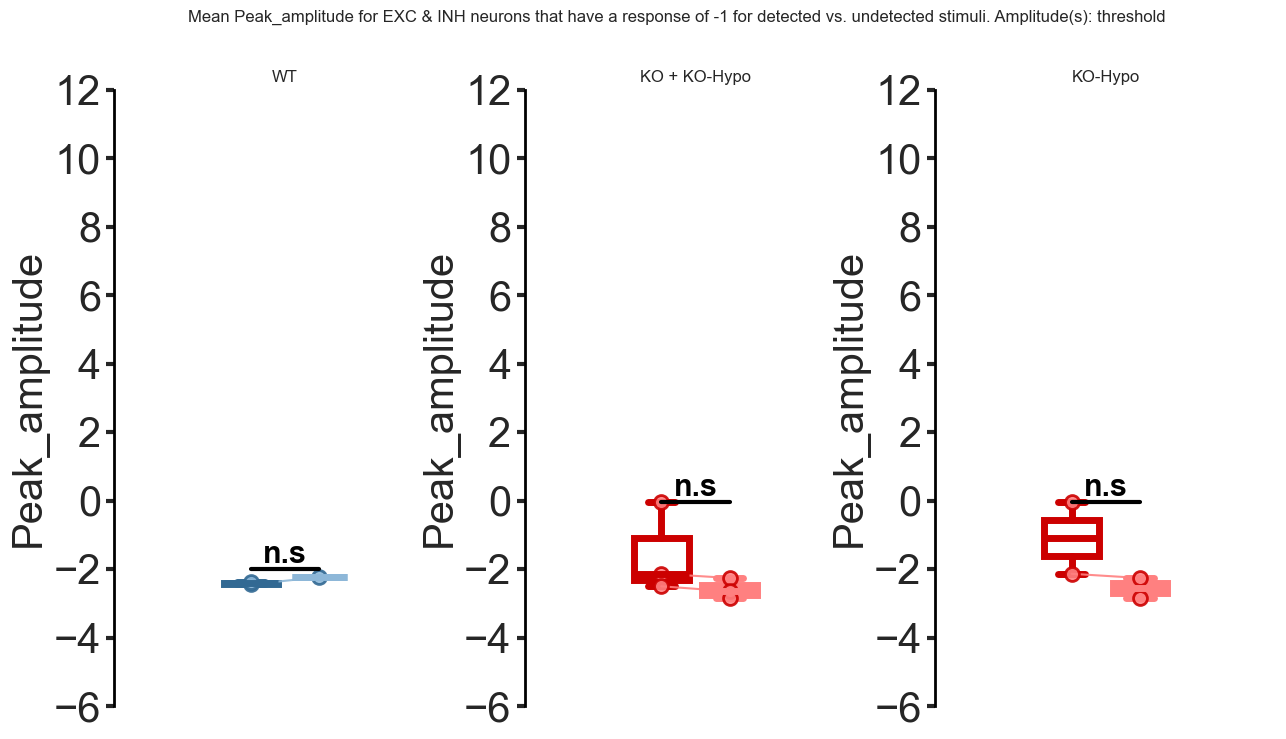

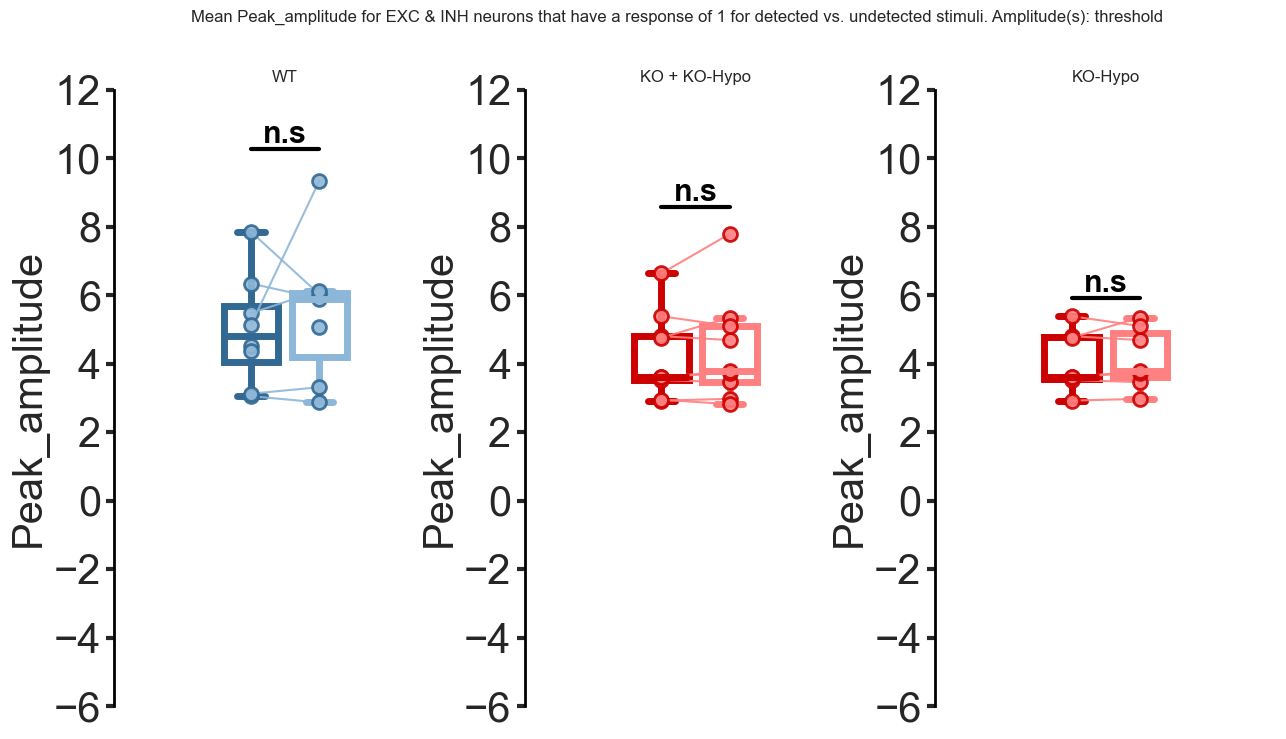

In [16]:
det_comp_param(recs, "Peak_amplitude", exc_neurons=True, inh_neurons=False, stim_ampl="threshold", ylim=[-5, 12])
det_comp_param(recs, "Peak_amplitude", exc_neurons=False, inh_neurons=True, stim_ampl="threshold", ylim=[-5, 12])
det_comp_param(recs, "Peak_amplitude", exc_neurons=True, inh_neurons=True, stim_ampl="threshold", ylim=[-5, 12])